# Prosjekt 3: Kompakte stjerner

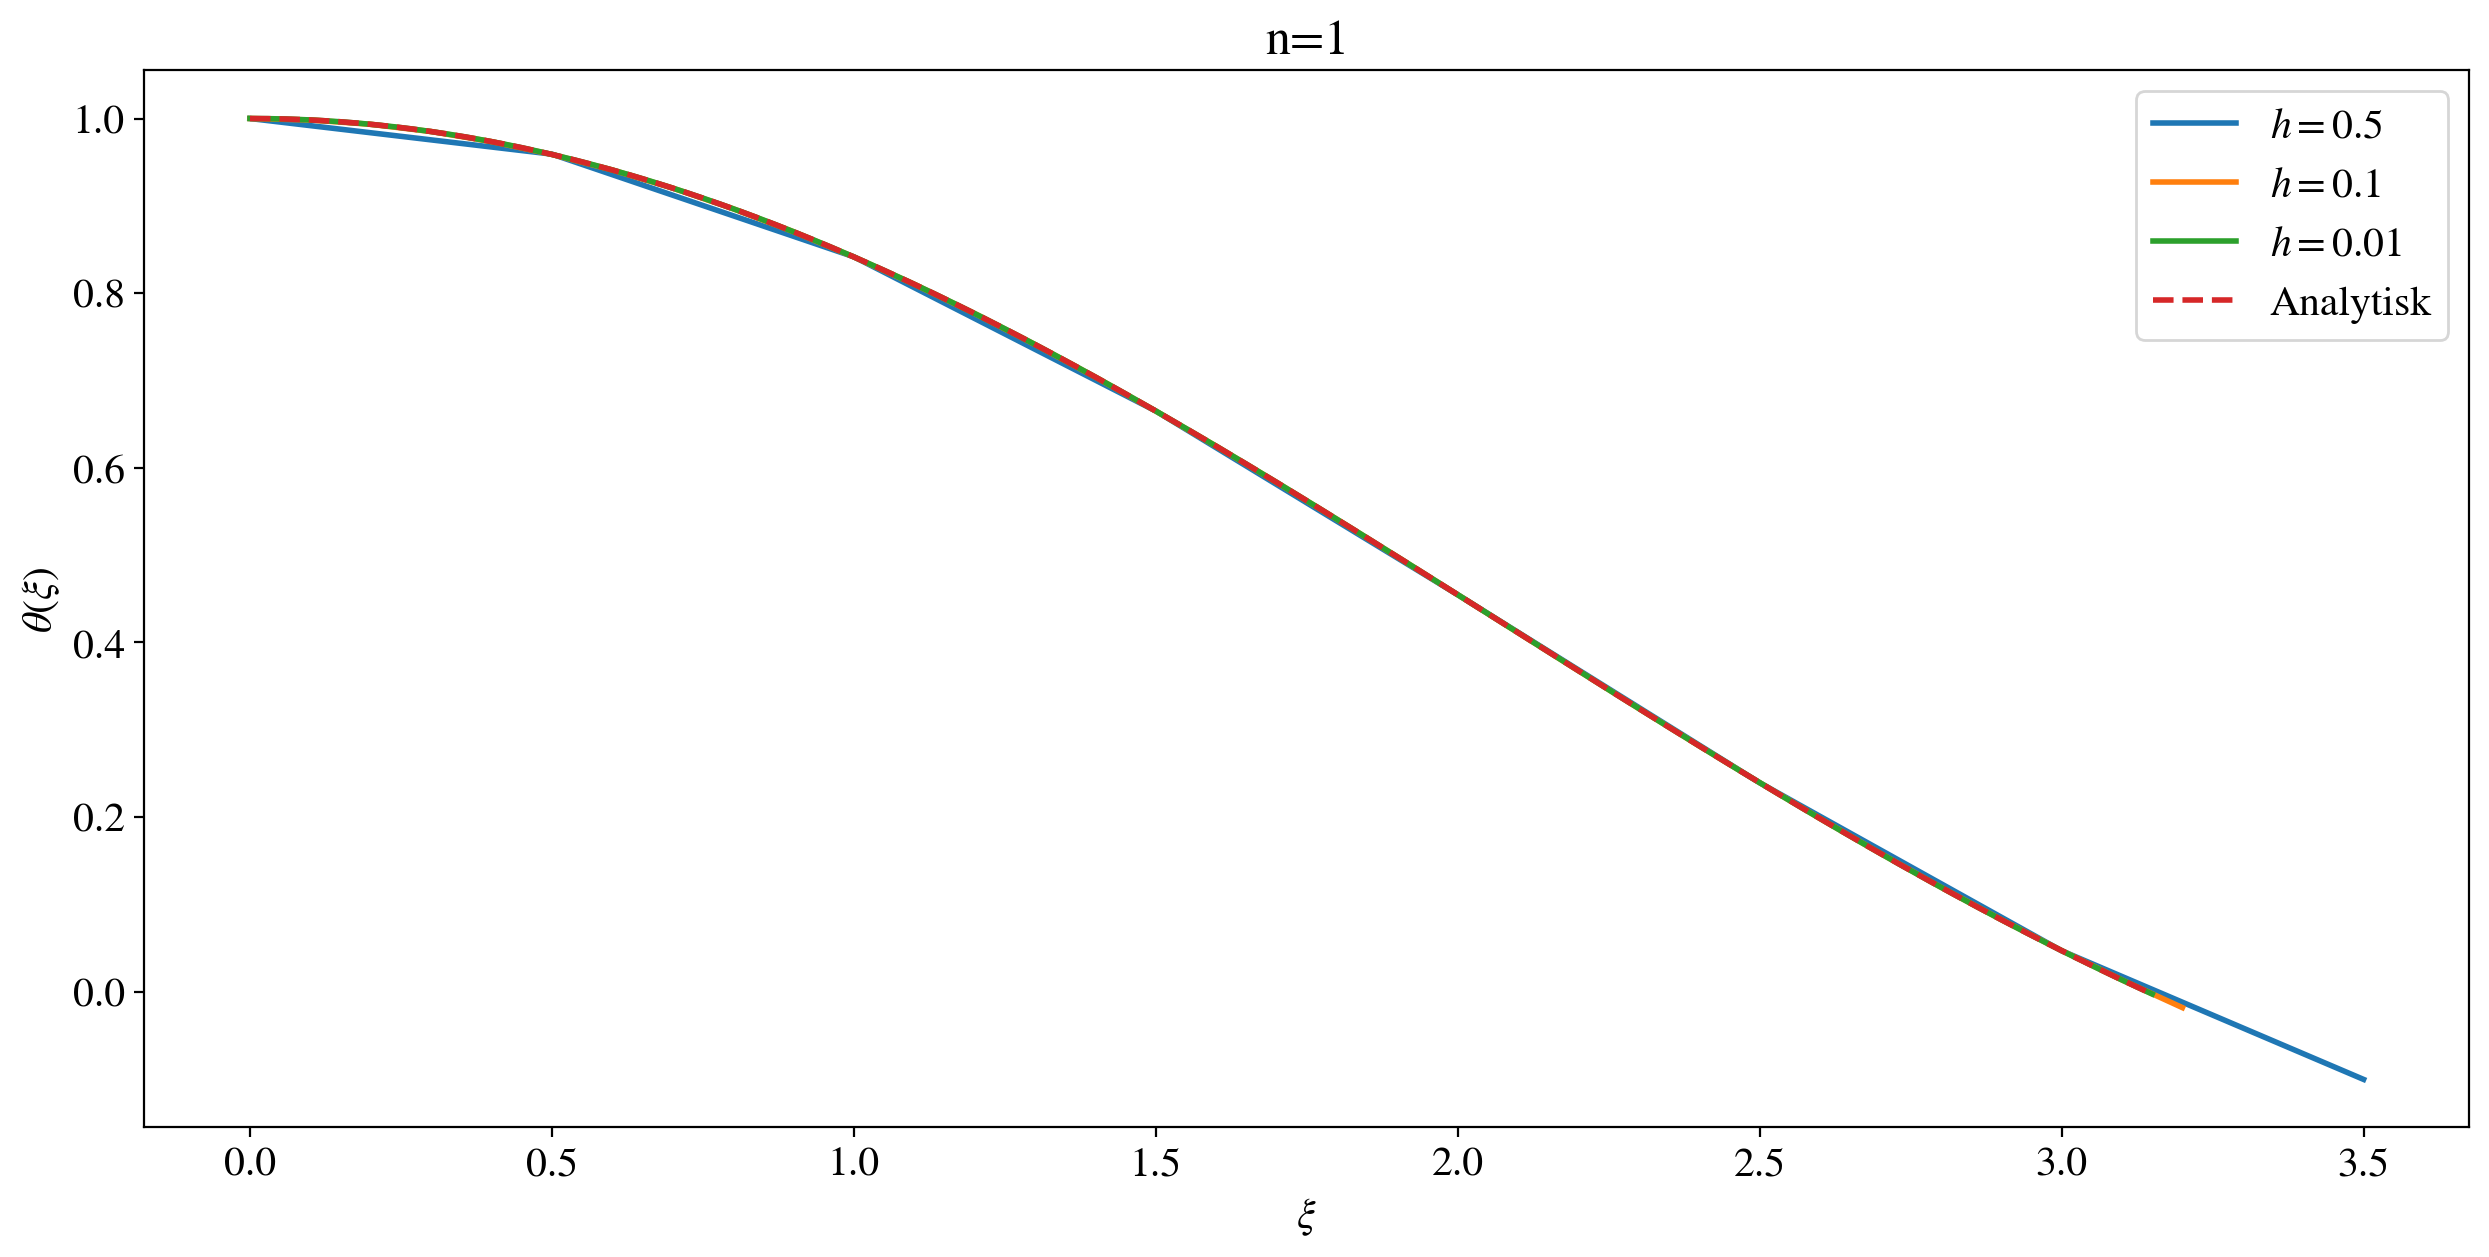

Ksi_N (n=1.5): 3.6537
Deriverte til theta i ksi_N, ganger ksi_N^2: 2.71422


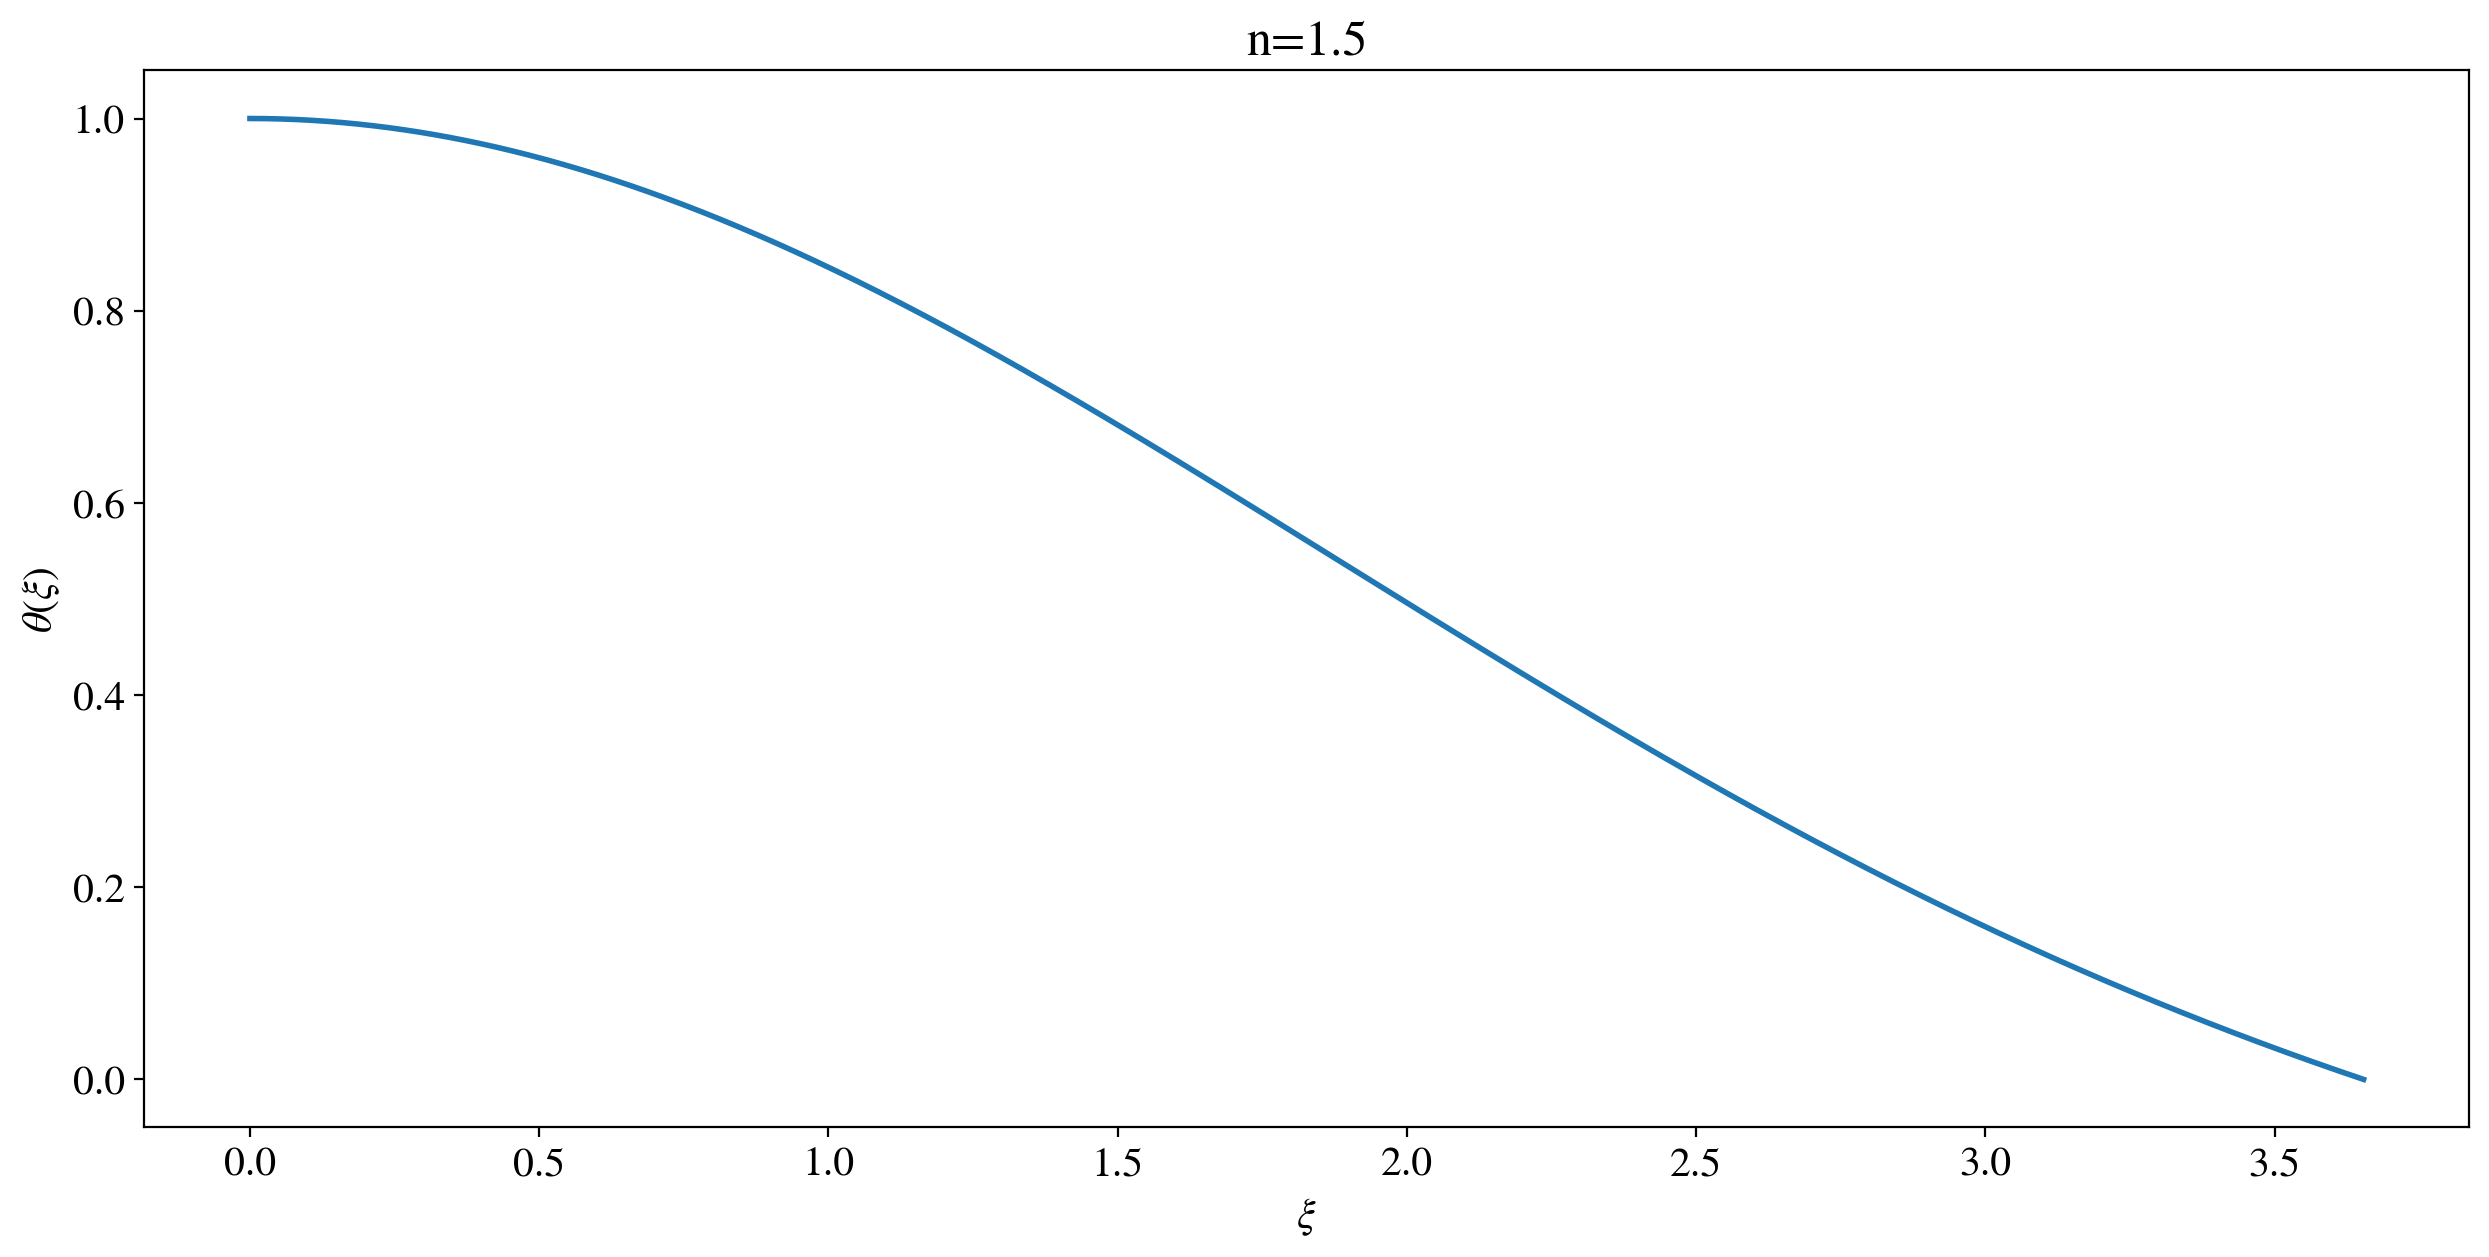

Ksi_N (n=3): 6.8967
Deriverte til theta i ksi_N, ganger ksi_N^2: 2.01817


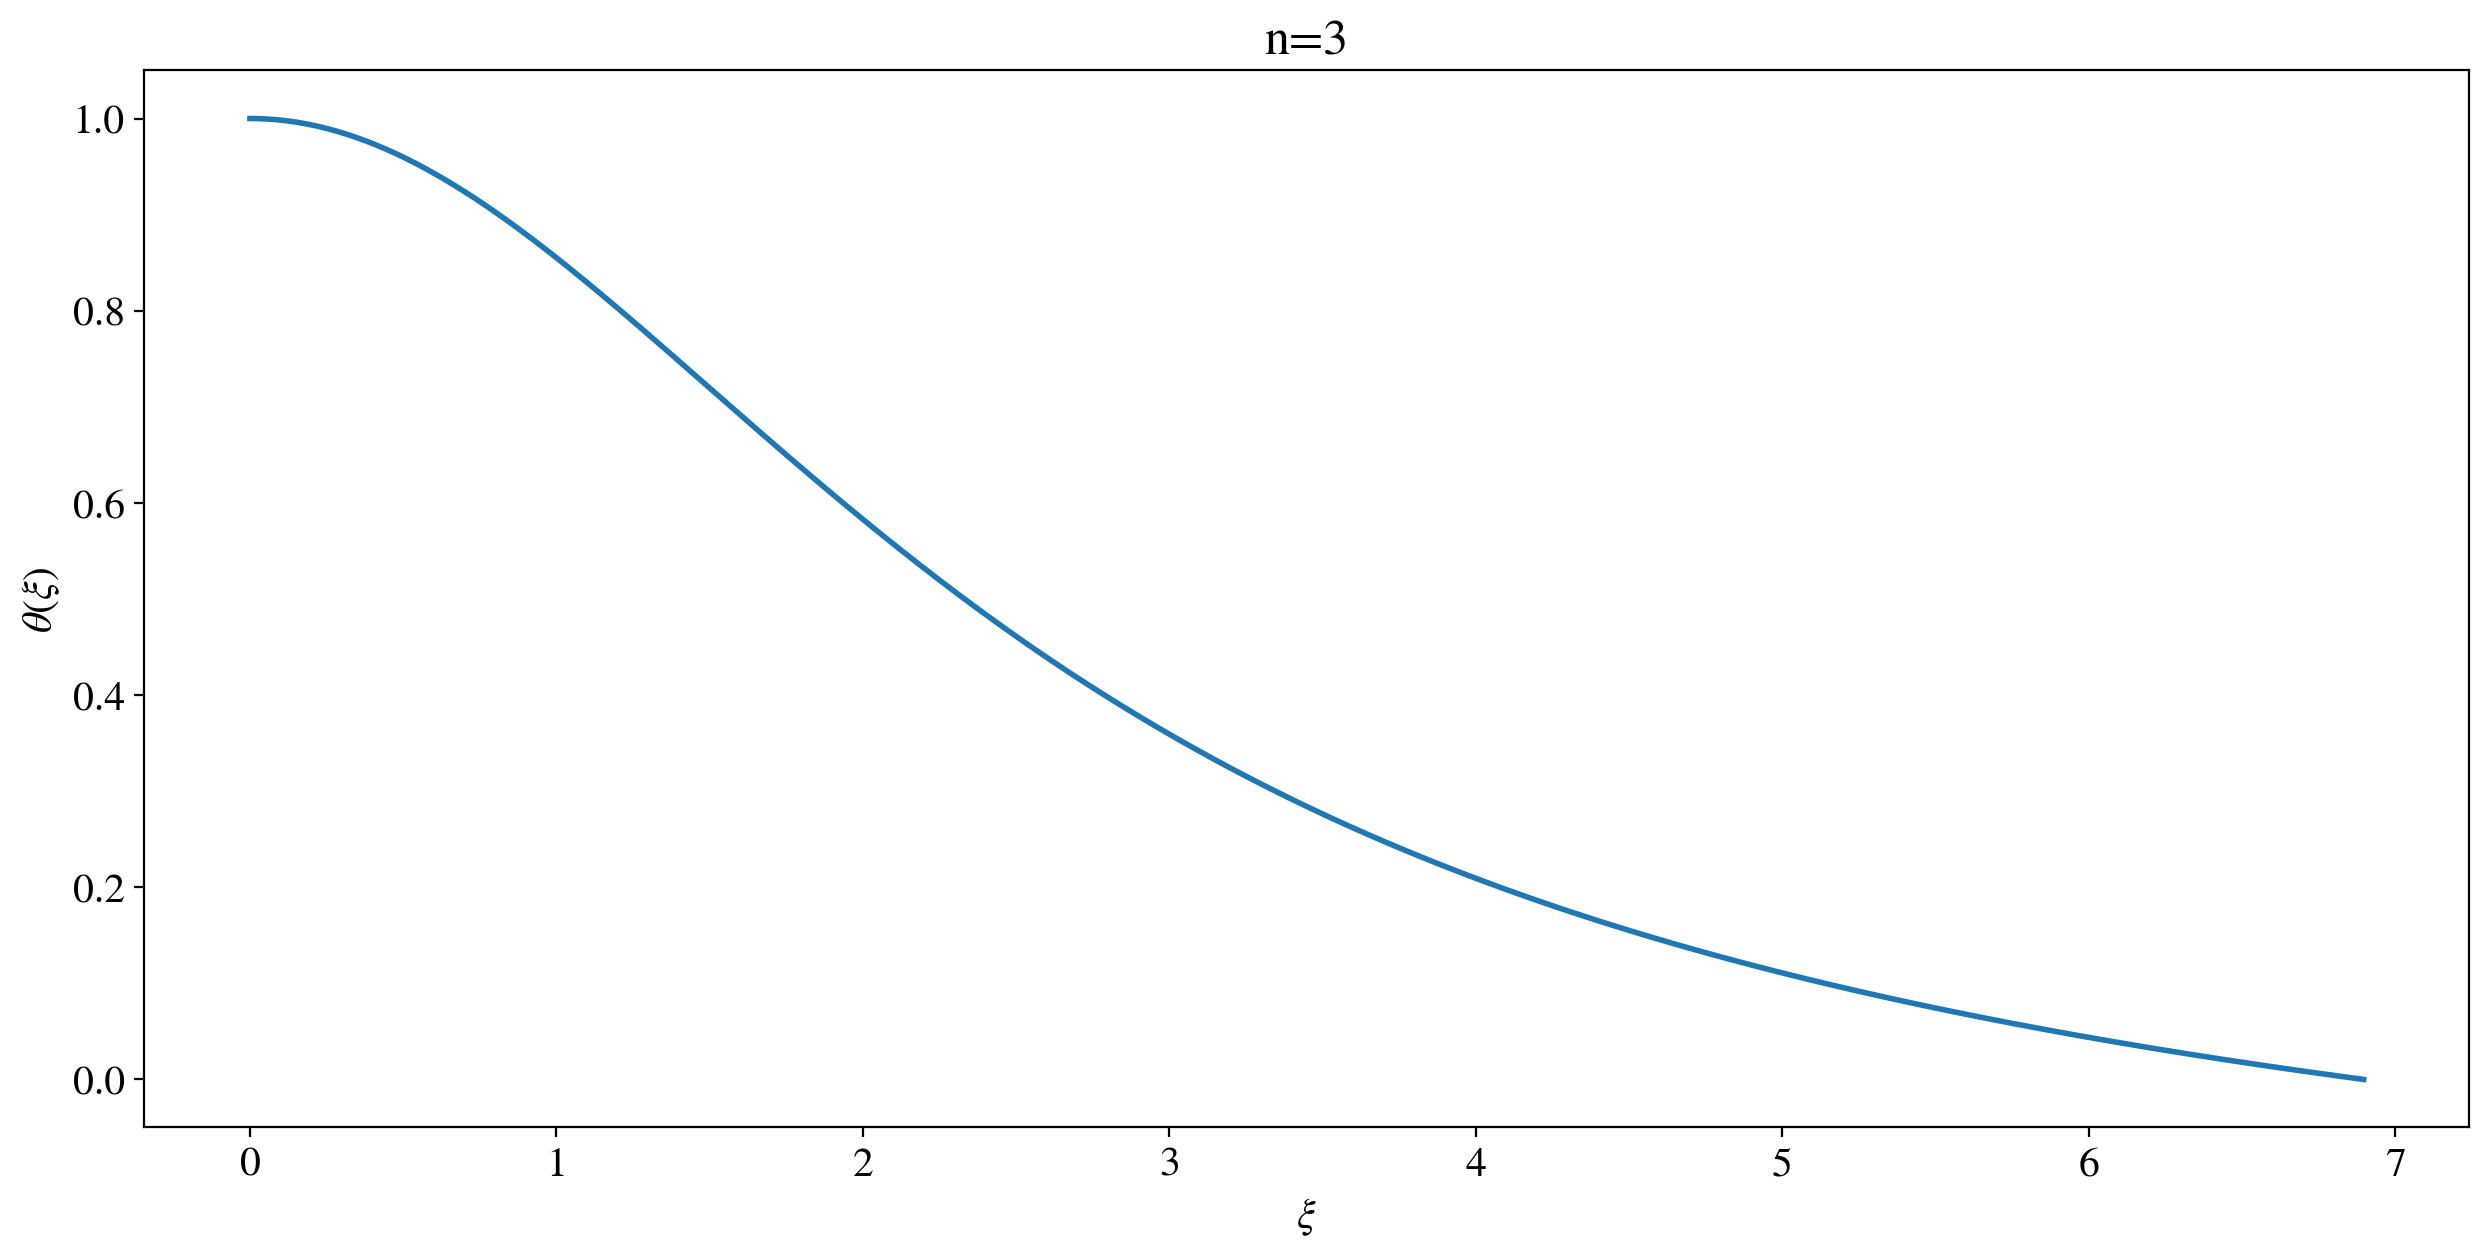

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

newparams = {'figure.figsize': (15, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)

def Lane_Emden(y, t_i, n):
    if t_i == 0:
        return np.array([y[1], -1/3])
    else:
        return np.array([y[1], -y[0]**(n)-2*y[1]/t_i])

def step_Euler(y, h, f, t_i, n):  
    next_y = y + h * f(y, t_i, n)   
    return next_y

def RK4_step(y, h, f, t_i, n):  
    s1 = f(y, t_i, n)
    s2 = f(y + (h / 2) * s1, t_i + h/2, n)  
    s3 = f(y + (h / 2) * s2, t_i + h/2, n) 
    s4 = f(y + h * s3, t_i + h, n) 
    return y + (h / 6) * (s1 + (2 * s2) + (2 * s3) + s4)

def numerical_solution(h, f, y_0, start_t, n, method): 
    t_list = np.zeros(1)
    y_list = np.zeros((1,2))
    t_list[0] = start_t
    y_list[0] = y_0
    
    i=0
    while True:
        val = method(y_list[i], h, f, t_list[i], n)  

        y_list = np.vstack((y_list, y_0))         
        t_list = np.append(t_list, start_t)     
        y_list[i+1] = val
        t_list[i+1] = t_list[i] + h 
        i += 1
        if val[0] <= 0:  
            break

    return y_list, t_list 

def an_solution(t_list):
    sol = np.zeros(len(t_list))
    if t_list[0] == 0:
        sol[0] = 1
        sol[1:] = np.sin(t_list[1:])/t_list[1:]
    else:
        sol = np.sin(t_list)/t_list
    return sol

def plot_Lane_Emden(h, start_t, n, method):
    y_0 = np.array([1,0])
   
    if n==1:
        if method=="Euler":
            for i in range(len(h)):
                y, t = numerical_solution(h[i], Lane_Emden, y_0, start_t, n, step_Euler)
                plt.plot(t, y[:,0], label=r"$h=$"+str(h[i]))
        else:
            for i in range(len(h)):
                y, t = numerical_solution(h[i], Lane_Emden, y_0, start_t, n, RK4_step)
                plt.plot(t, y[:,0], label=r"$h=$"+str(h[i]))
        plt.plot(t, an_solution(t), label="Analytisk", linestyle='dashed')
        plt.legend()
    else:
        if method=="Euler":
            y, t = numerical_solution(h, Lane_Emden, y_0, start_t, n, step_Euler)
        else:
            y, t = numerical_solution(h, Lane_Emden, y_0, start_t, n, RK4_step)
        theta=y[:,0]
        print("Ksi_N (n=" + str(n) + "):", round(t[-1],5))
        val = t[-1]**2 * abs((theta[-1]-theta[-2])/h)
        print("Deriverte til theta i ksi_N, ganger ksi_N^2:", round(val,5))
        plt.plot(t, theta)
    
    plt.title("n=" + str(n))
    plt.xlabel(r"$\xi$")
    plt.ylabel(r"$\theta(\xi)$")
    plt.show()


start_t = 0  
n_values = [1, 3/2, 3]
h_list = [0.5, 0.1, 0.01]

#Opg. 3.d)
#plot_Lane_Emden(h_list, start_t, n_values[0], "Euler")
#Opg. 3.f)
plot_Lane_Emden(h_list, start_t, n_values[0], "RK4")

h = 1e-4
#Opg. 3.e)
plot_Lane_Emden(h, start_t, n_values[1], "Euler")
plot_Lane_Emden(h, start_t, n_values[2], "Euler")

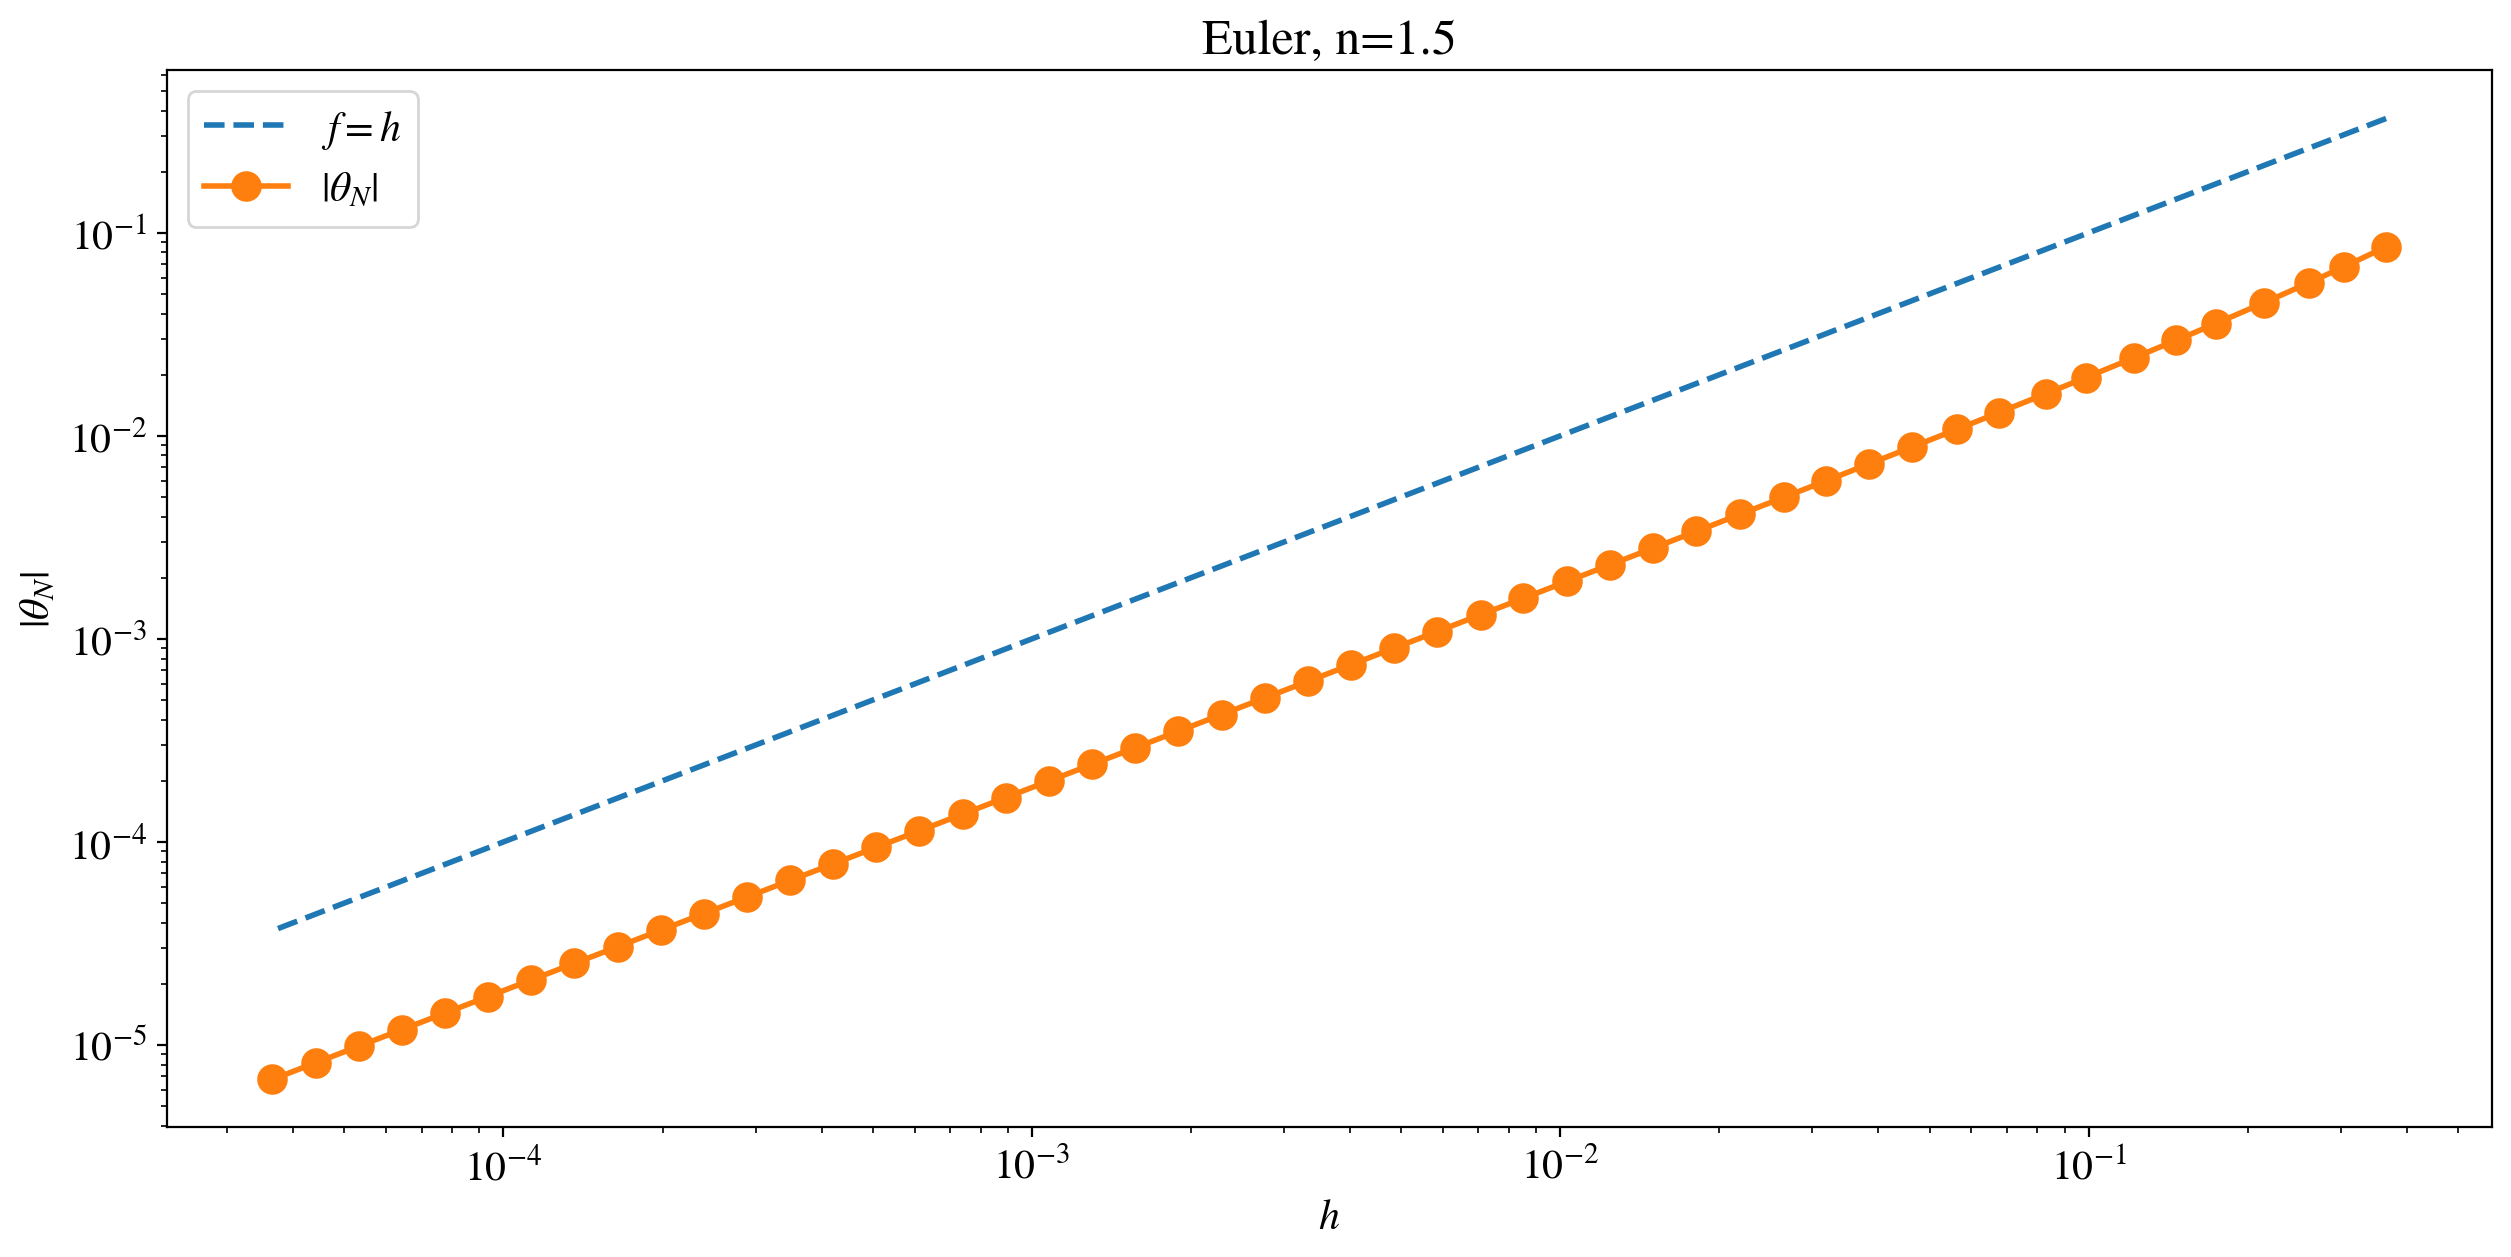

/Users/jimtotland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


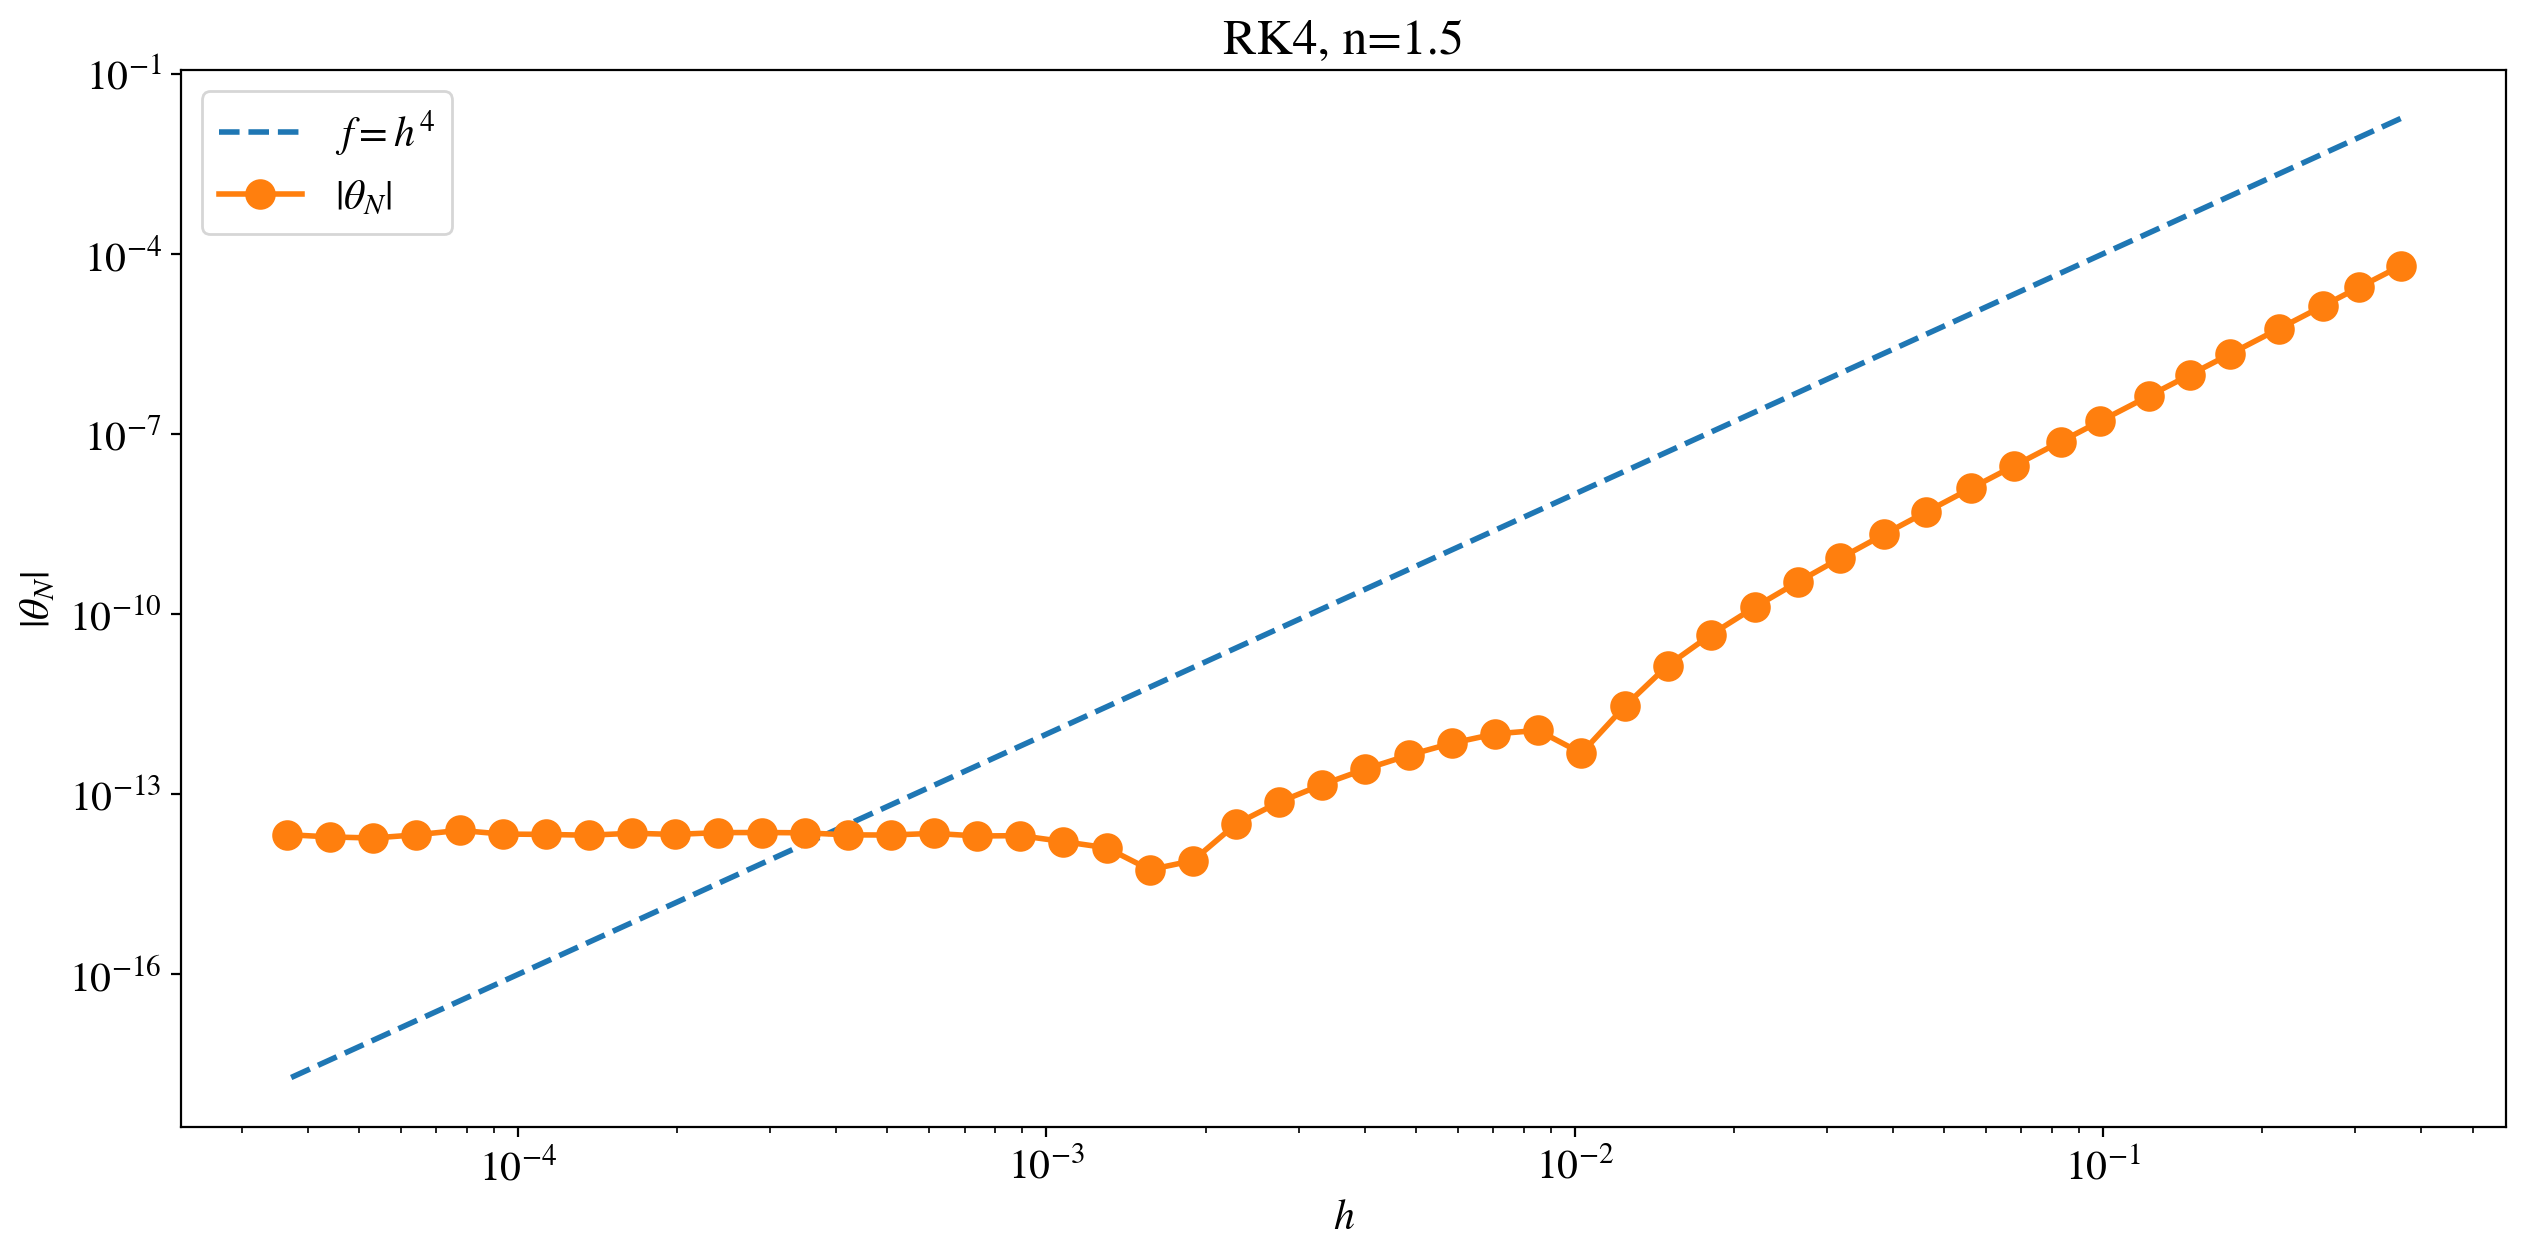

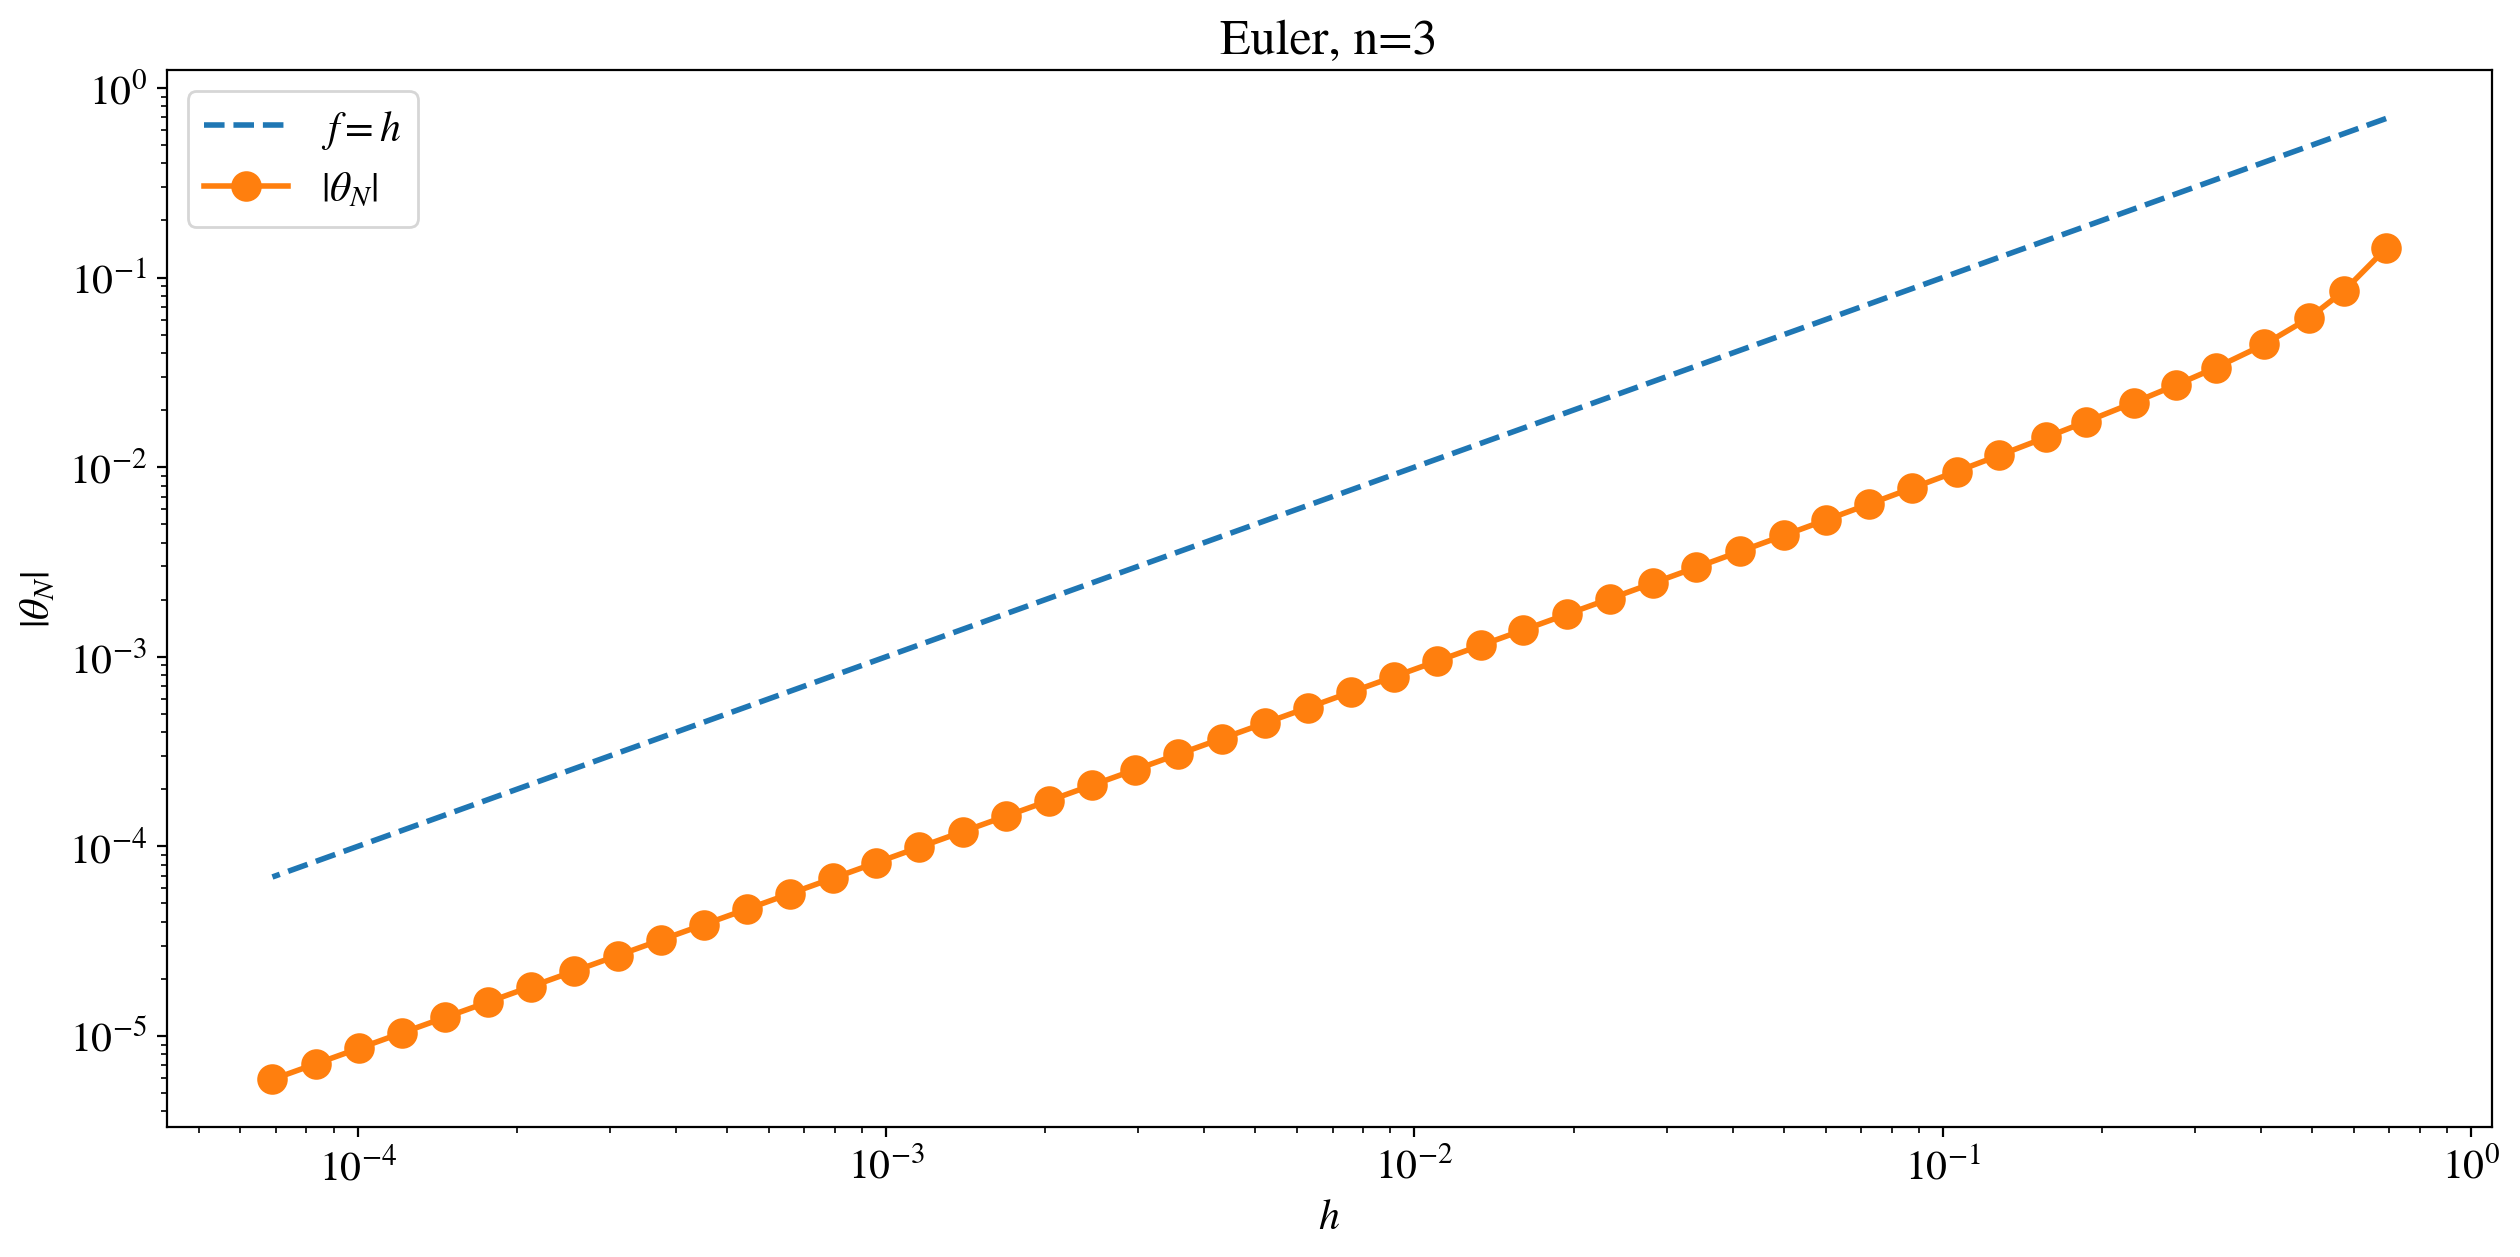

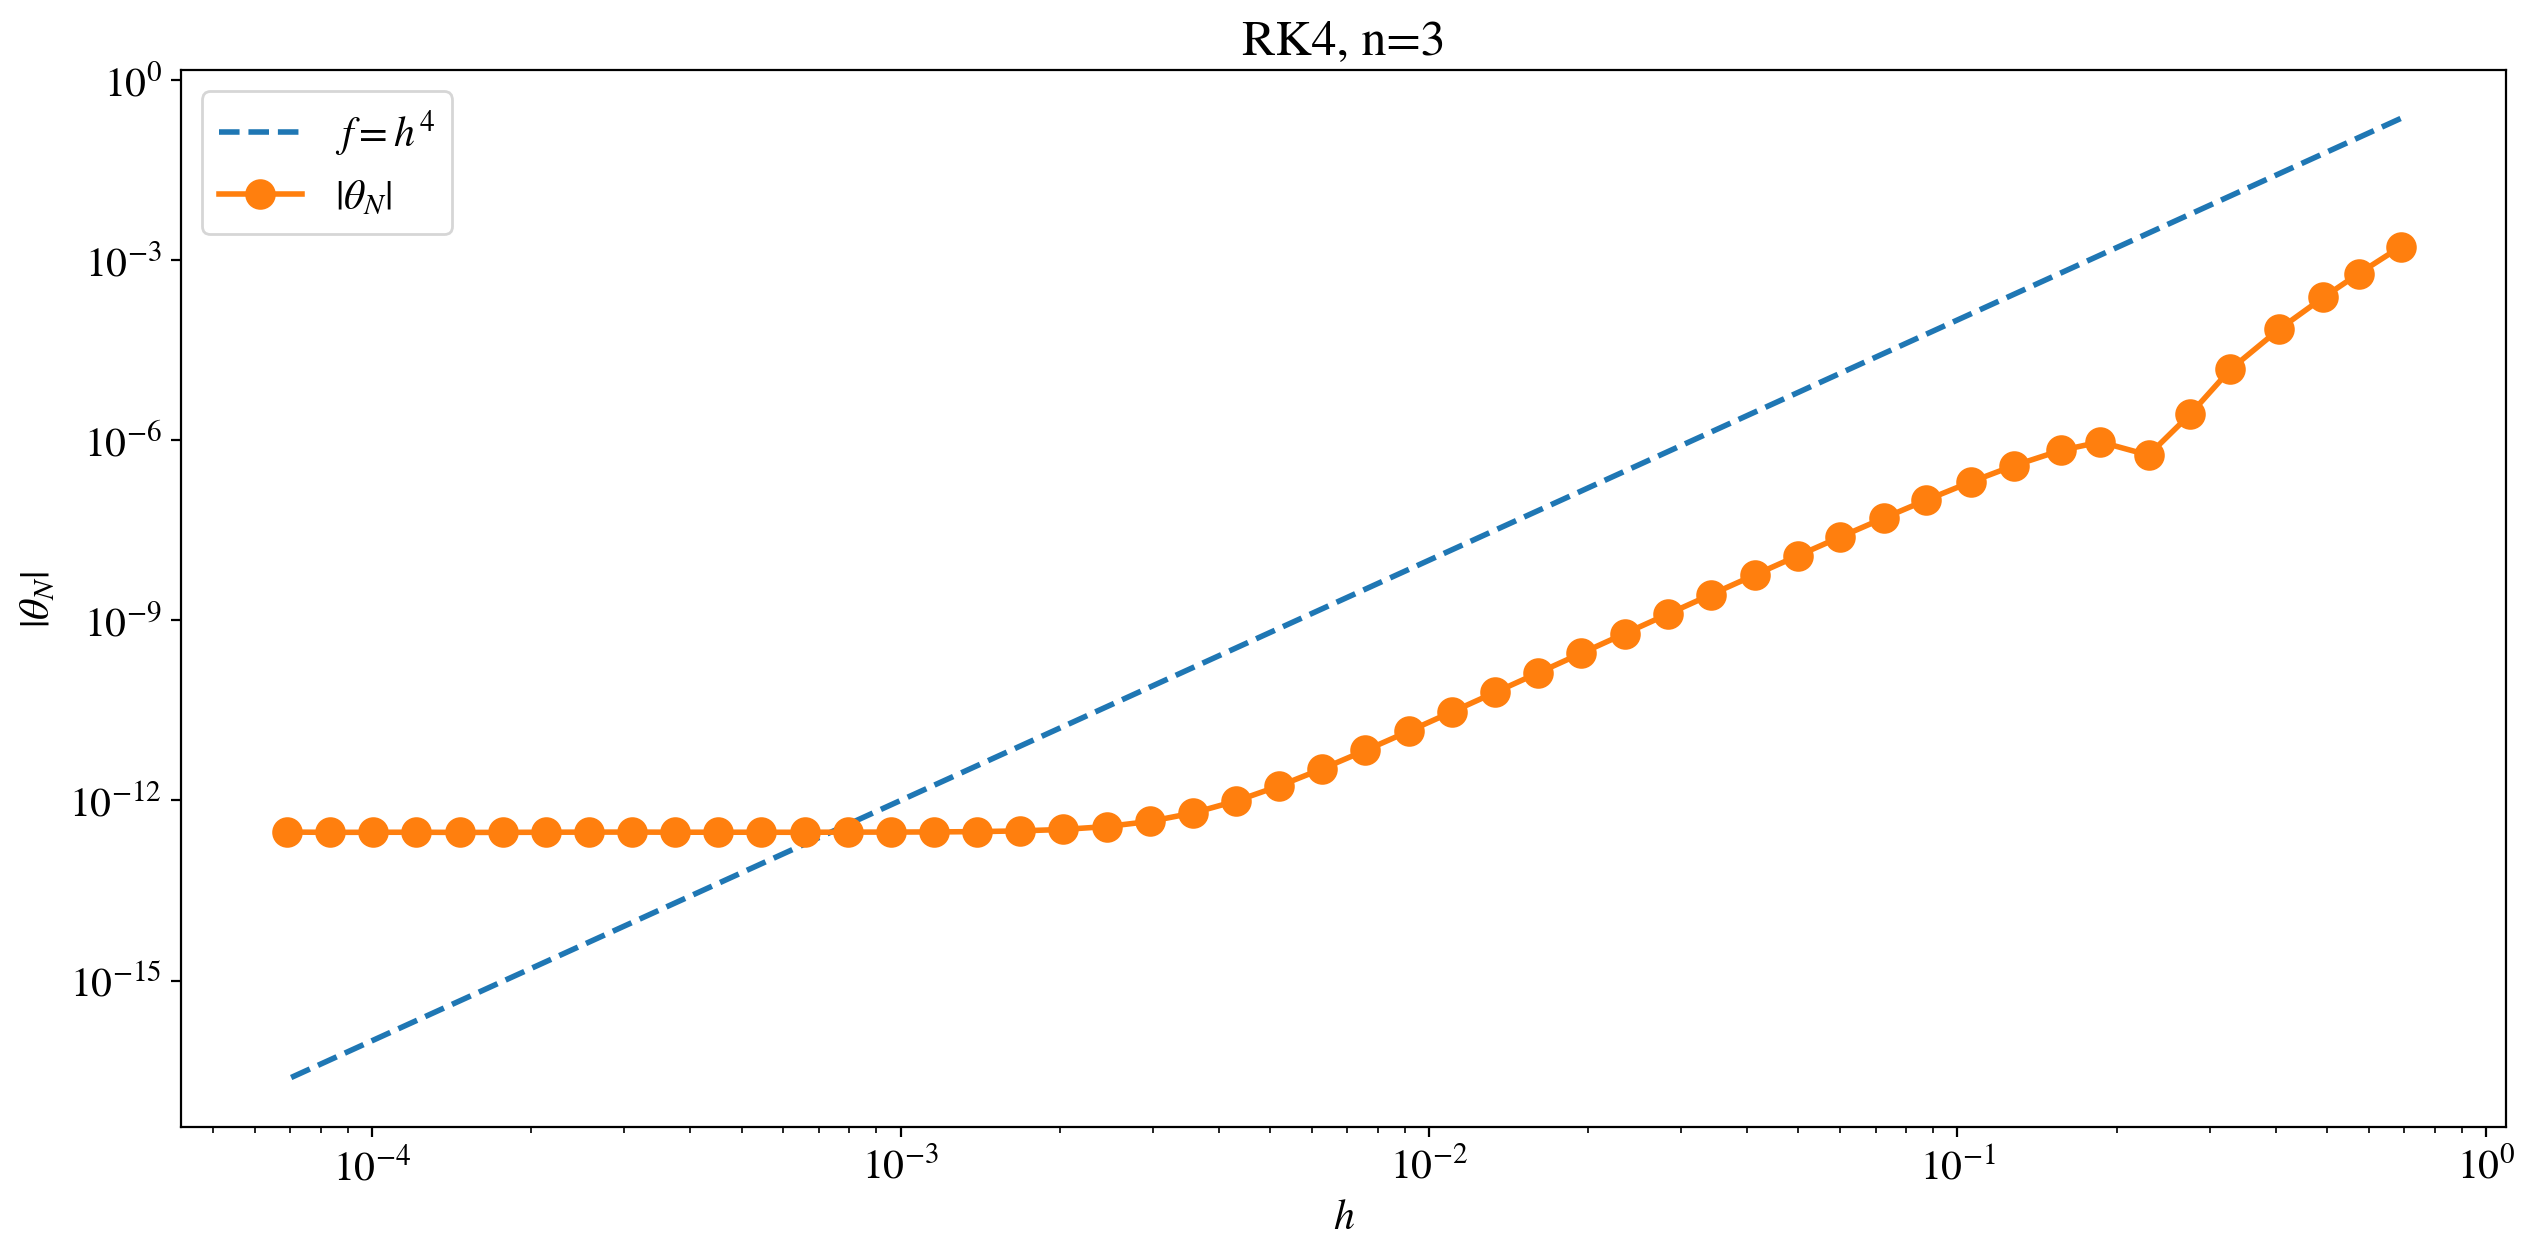

In [3]:
def f(x):
  return x
def g(x):
  return x**4


def numerical_solution_fixed_seperation_of_interval(N, f, y_0, start_t, end_t, n, method):
    h = (end_t-start_t)/N
    t_list = np.linspace(start_t, end_t, N + 1)
    y_list = np.zeros((N+1,2))
    y_list[0] = y_0
    for i in range(0, N):
        y_list[i+1] = method(y_list[i], h, f, t_list[i], n)  
    return y_list, h

def find_en_list_N(N_list, f, y_0, start_t, end_t, n, method):
    en_list = np.zeros(len(N_list))
    h_list = np.zeros(len(N_list))
    for i in range(len(N_list)):
        y,h_list[i] = numerical_solution_fixed_seperation_of_interval(N_list[i], f, y_0, start_t, end_t, n, method)
        en_list[i] = abs(y[-1,0])
    return en_list, h_list

def plot_global_error_vs_h(N_list, start_t, end_t, n, method):
    y_0 = np.array([1,0])
    if method == "Euler":
        en_list, h_list = find_en_list_N(N_list, Lane_Emden, y_0, start_t, end_t, n, step_Euler)
        plt.title(method + ", n=" + str(n))
        plt.plot(h_list,f(h_list),label = r"$f = h$",linestyle = "dashed")
    else:
        en_list, h_list = find_en_list_N(N_list, Lane_Emden, y_0, start_t, end_t, n, RK4_step)
        plt.title(method + ", n=" + str(n))
        plt.plot(h_list, g(h_list), label = r"$f = h^4$", linestyle = "dashed")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r"$h$")
    plt.ylabel(r"$|\theta_N|$")
    plt.plot(h_list, en_list, label=r"$|\theta_N |$", marker = "o")
    plt.legend()
    plt.show()

start_t = 0       
end_t_values = [3.653753736219229, 6.89684861937]
n_values = [1, 3/2, 3]
N_list = np.unique(np.logspace(1,5,50,base = 10,dtype = int))

plot_global_error_vs_h(N_list, start_t, end_t_values[0], n_values[1], "Euler")
plot_global_error_vs_h(N_list, start_t, end_t_values[0], n_values[1], "RK4")

plot_global_error_vs_h(N_list, start_t, end_t_values[1], n_values[2], "Euler")
plot_global_error_vs_h(N_list, start_t, end_t_values[1], n_values[2], "RK4")

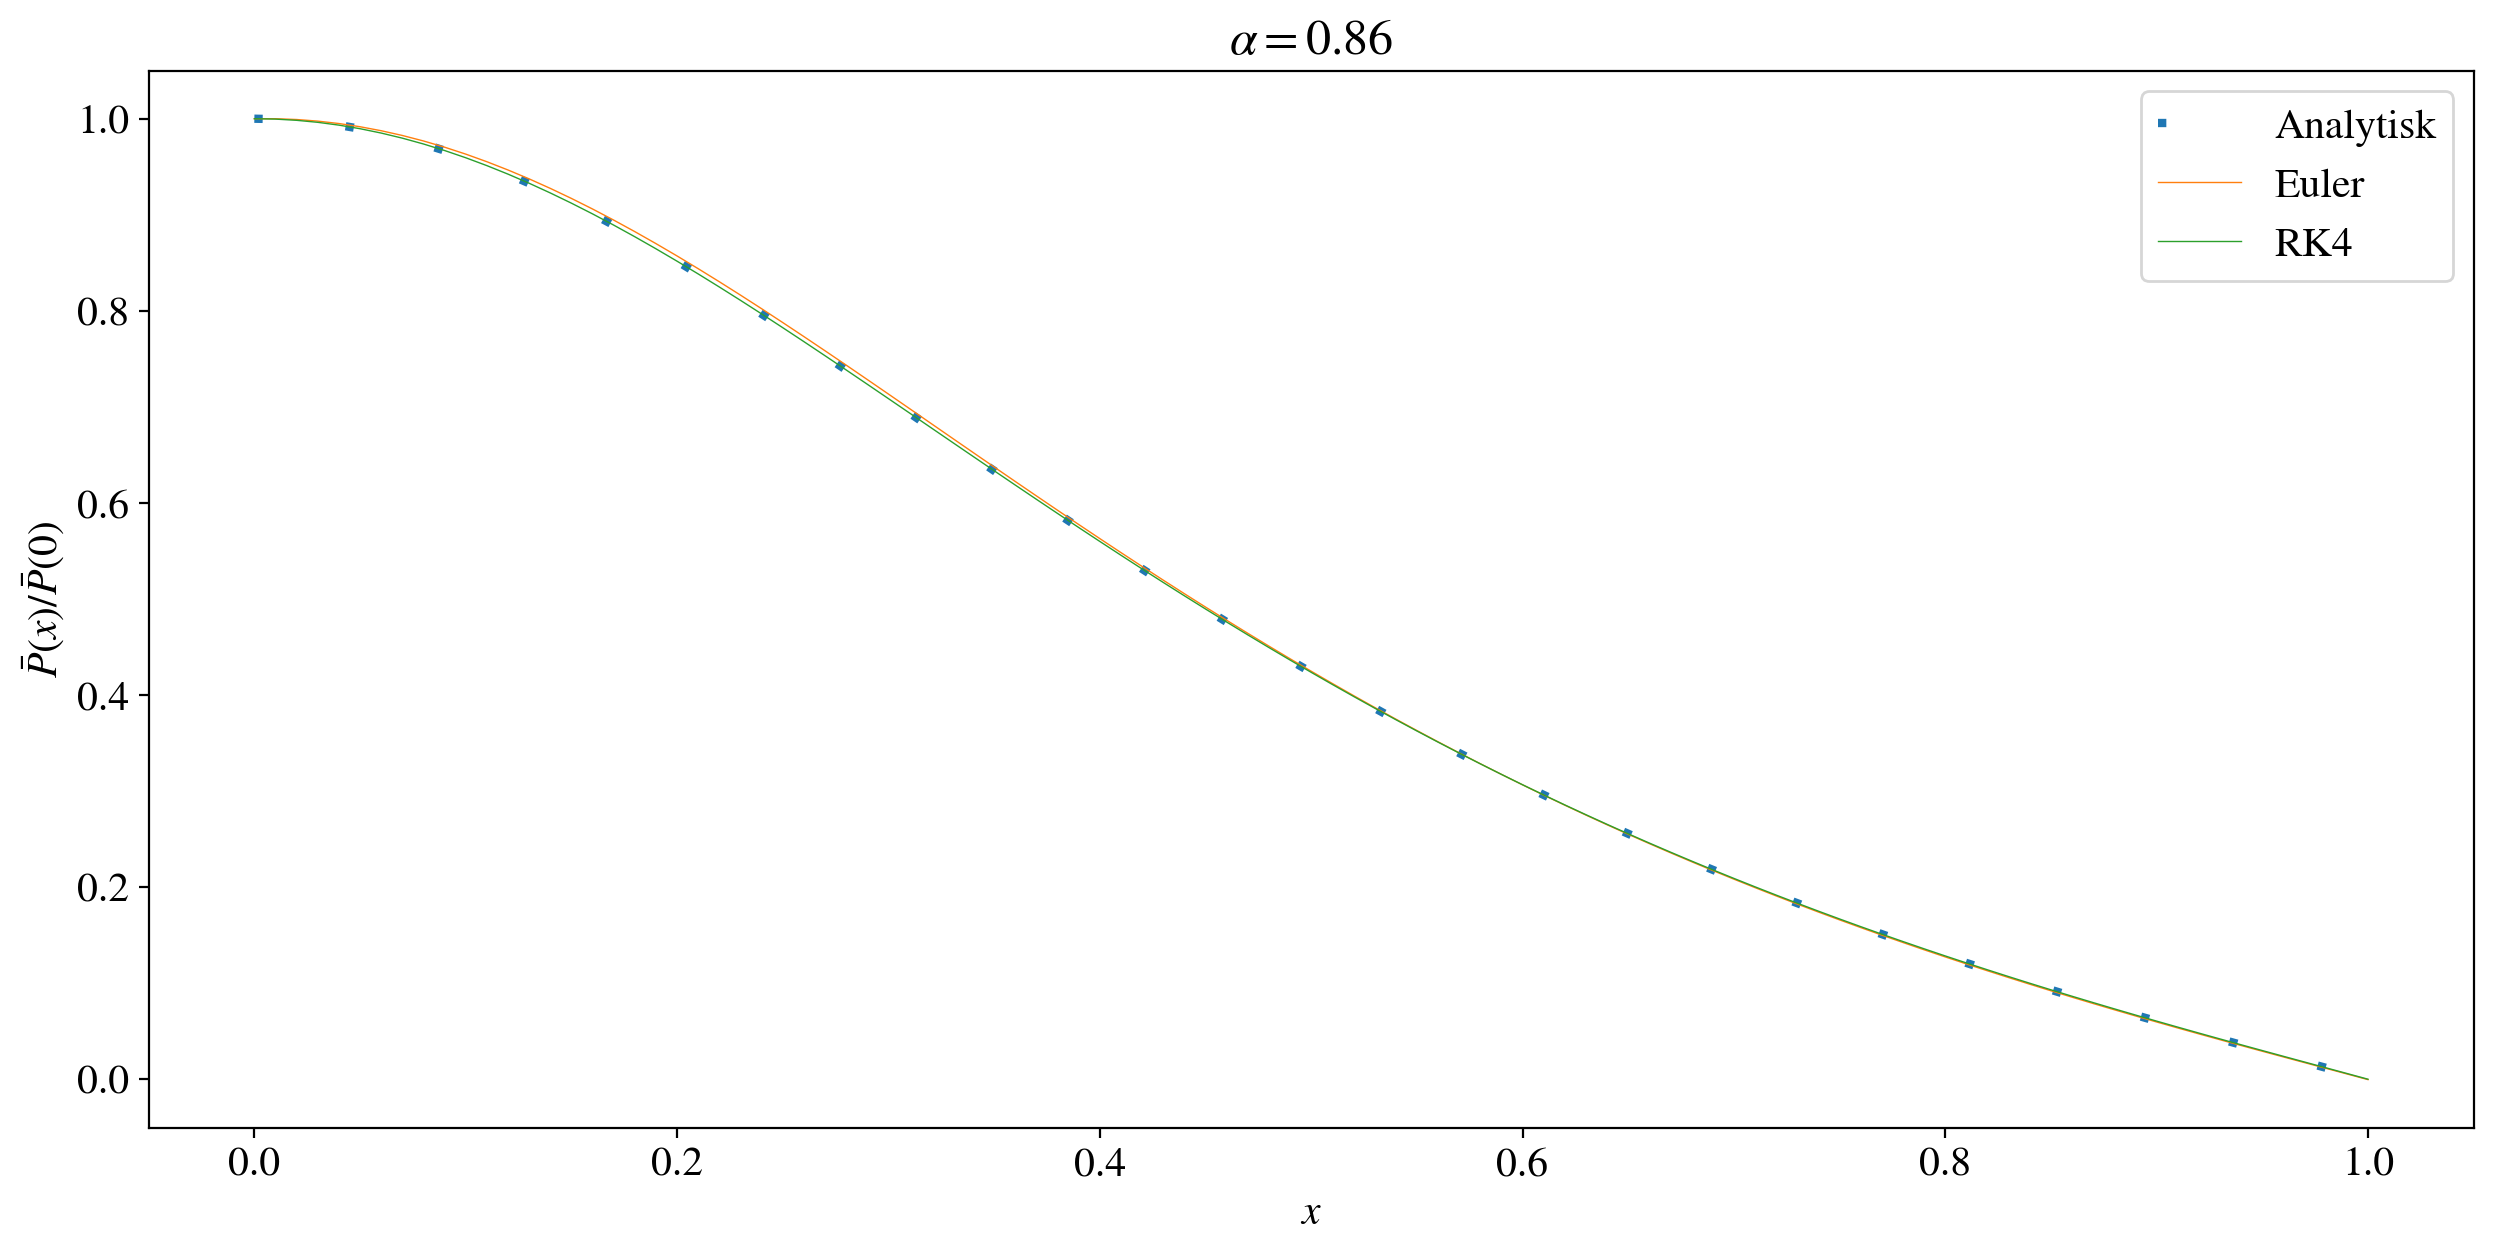

e_n(Euler): 0.0021356269318752903
e_n(RK4): 5.530959576102723e-08


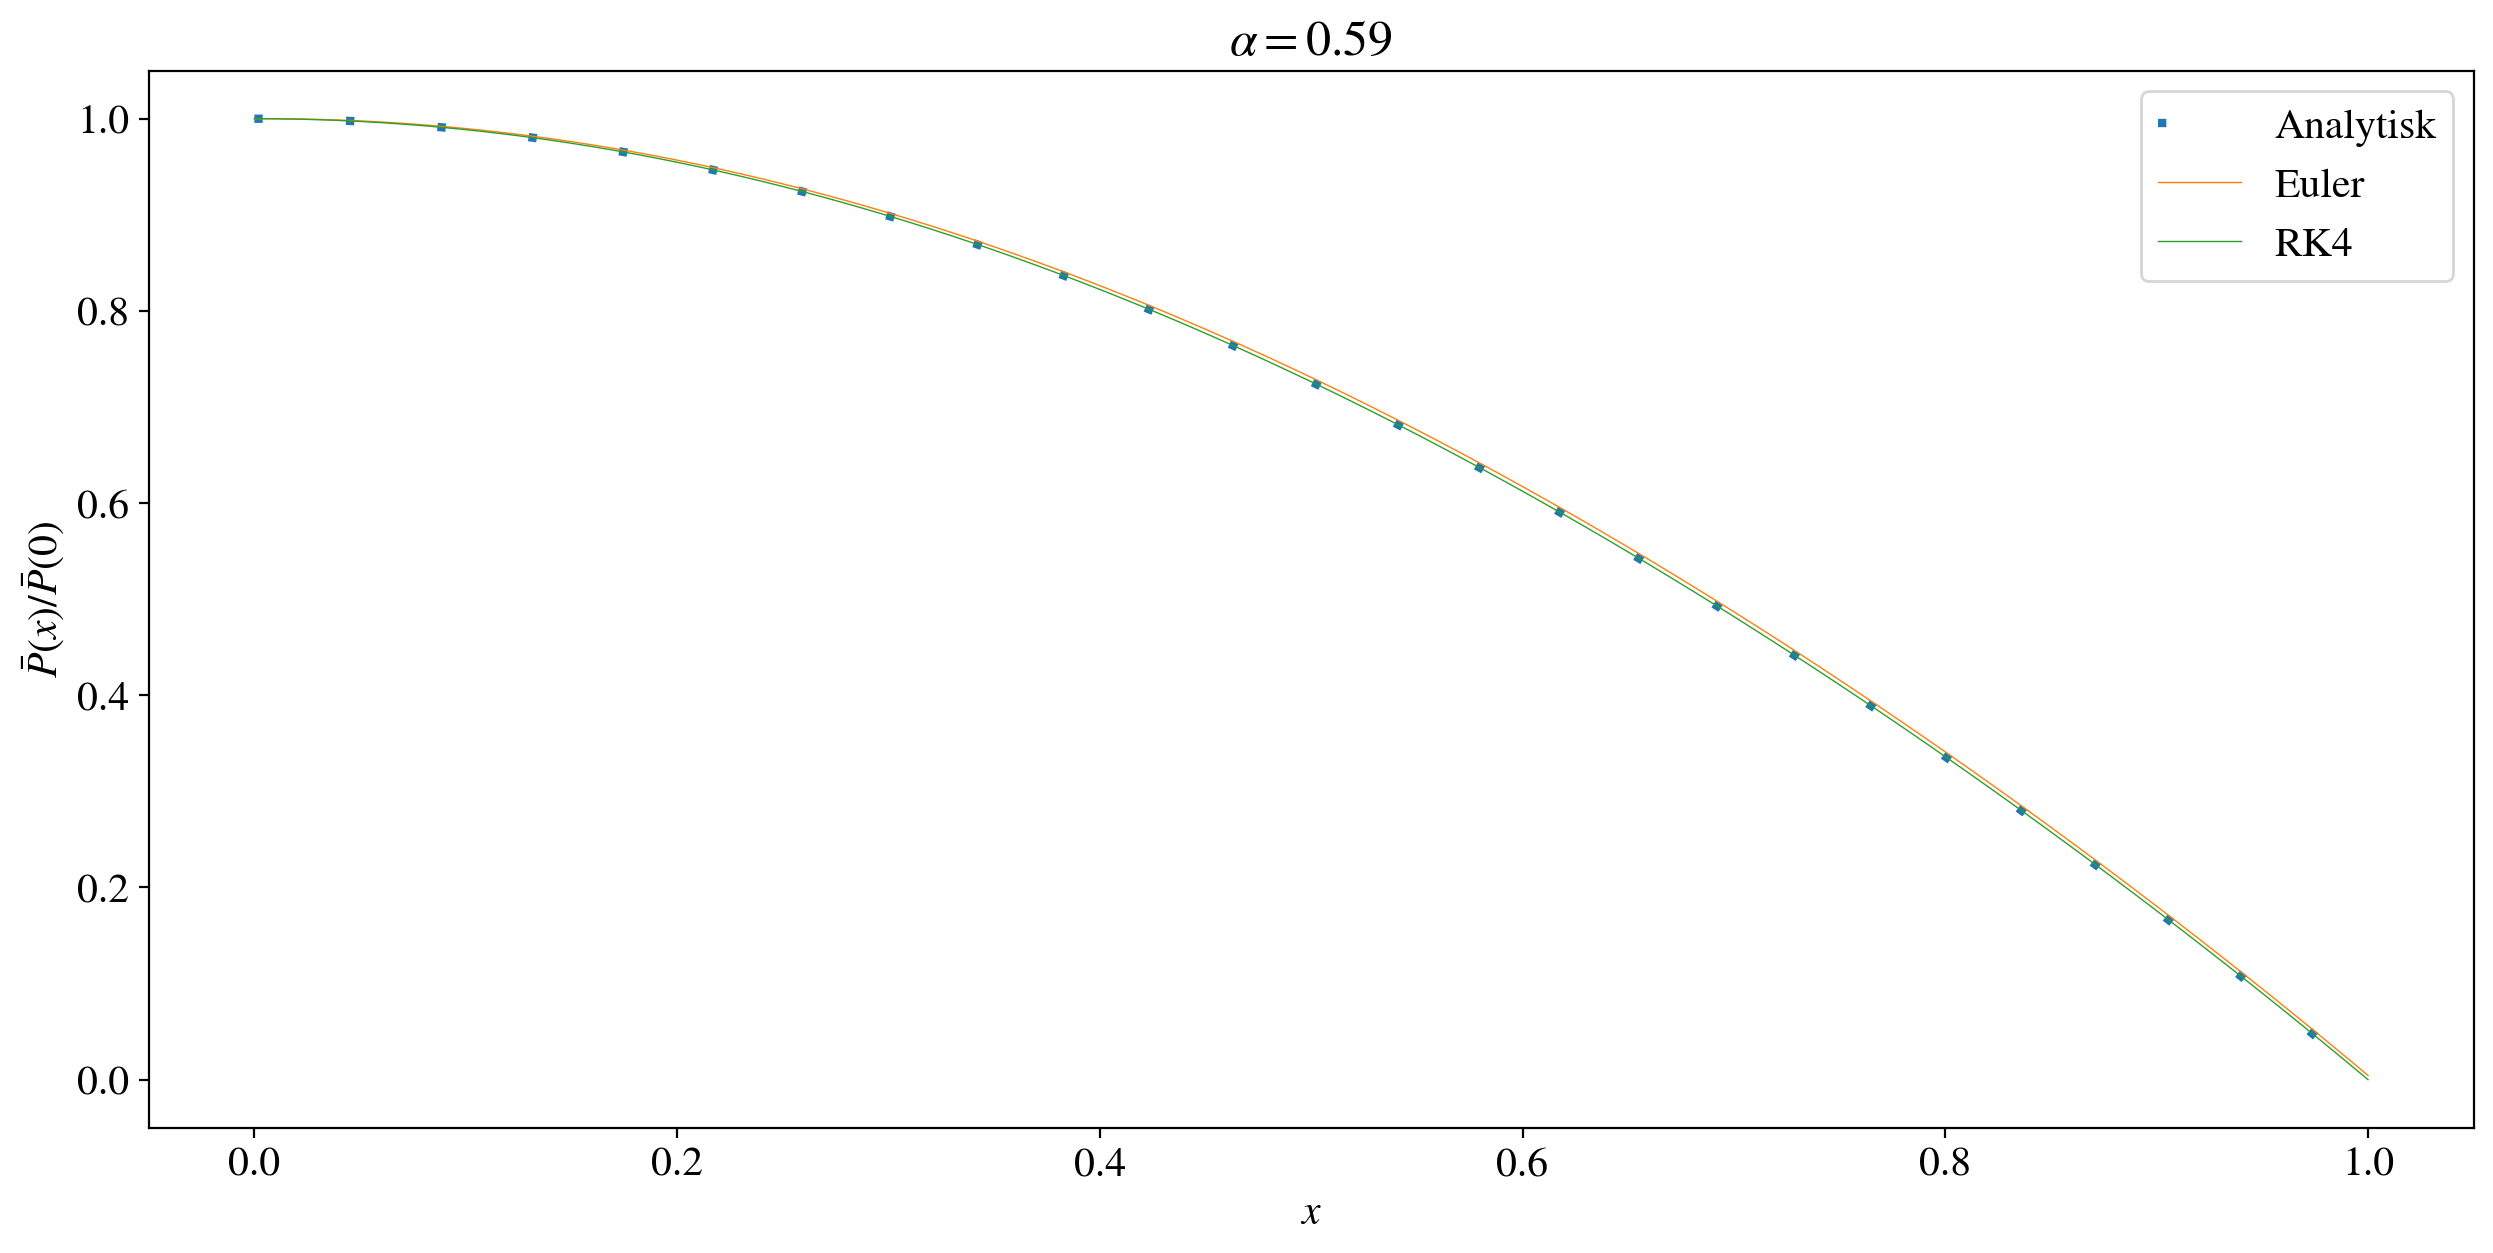

e_n(Euler): 0.001703682242740868
e_n(RK4): 5.907020289575016e-10


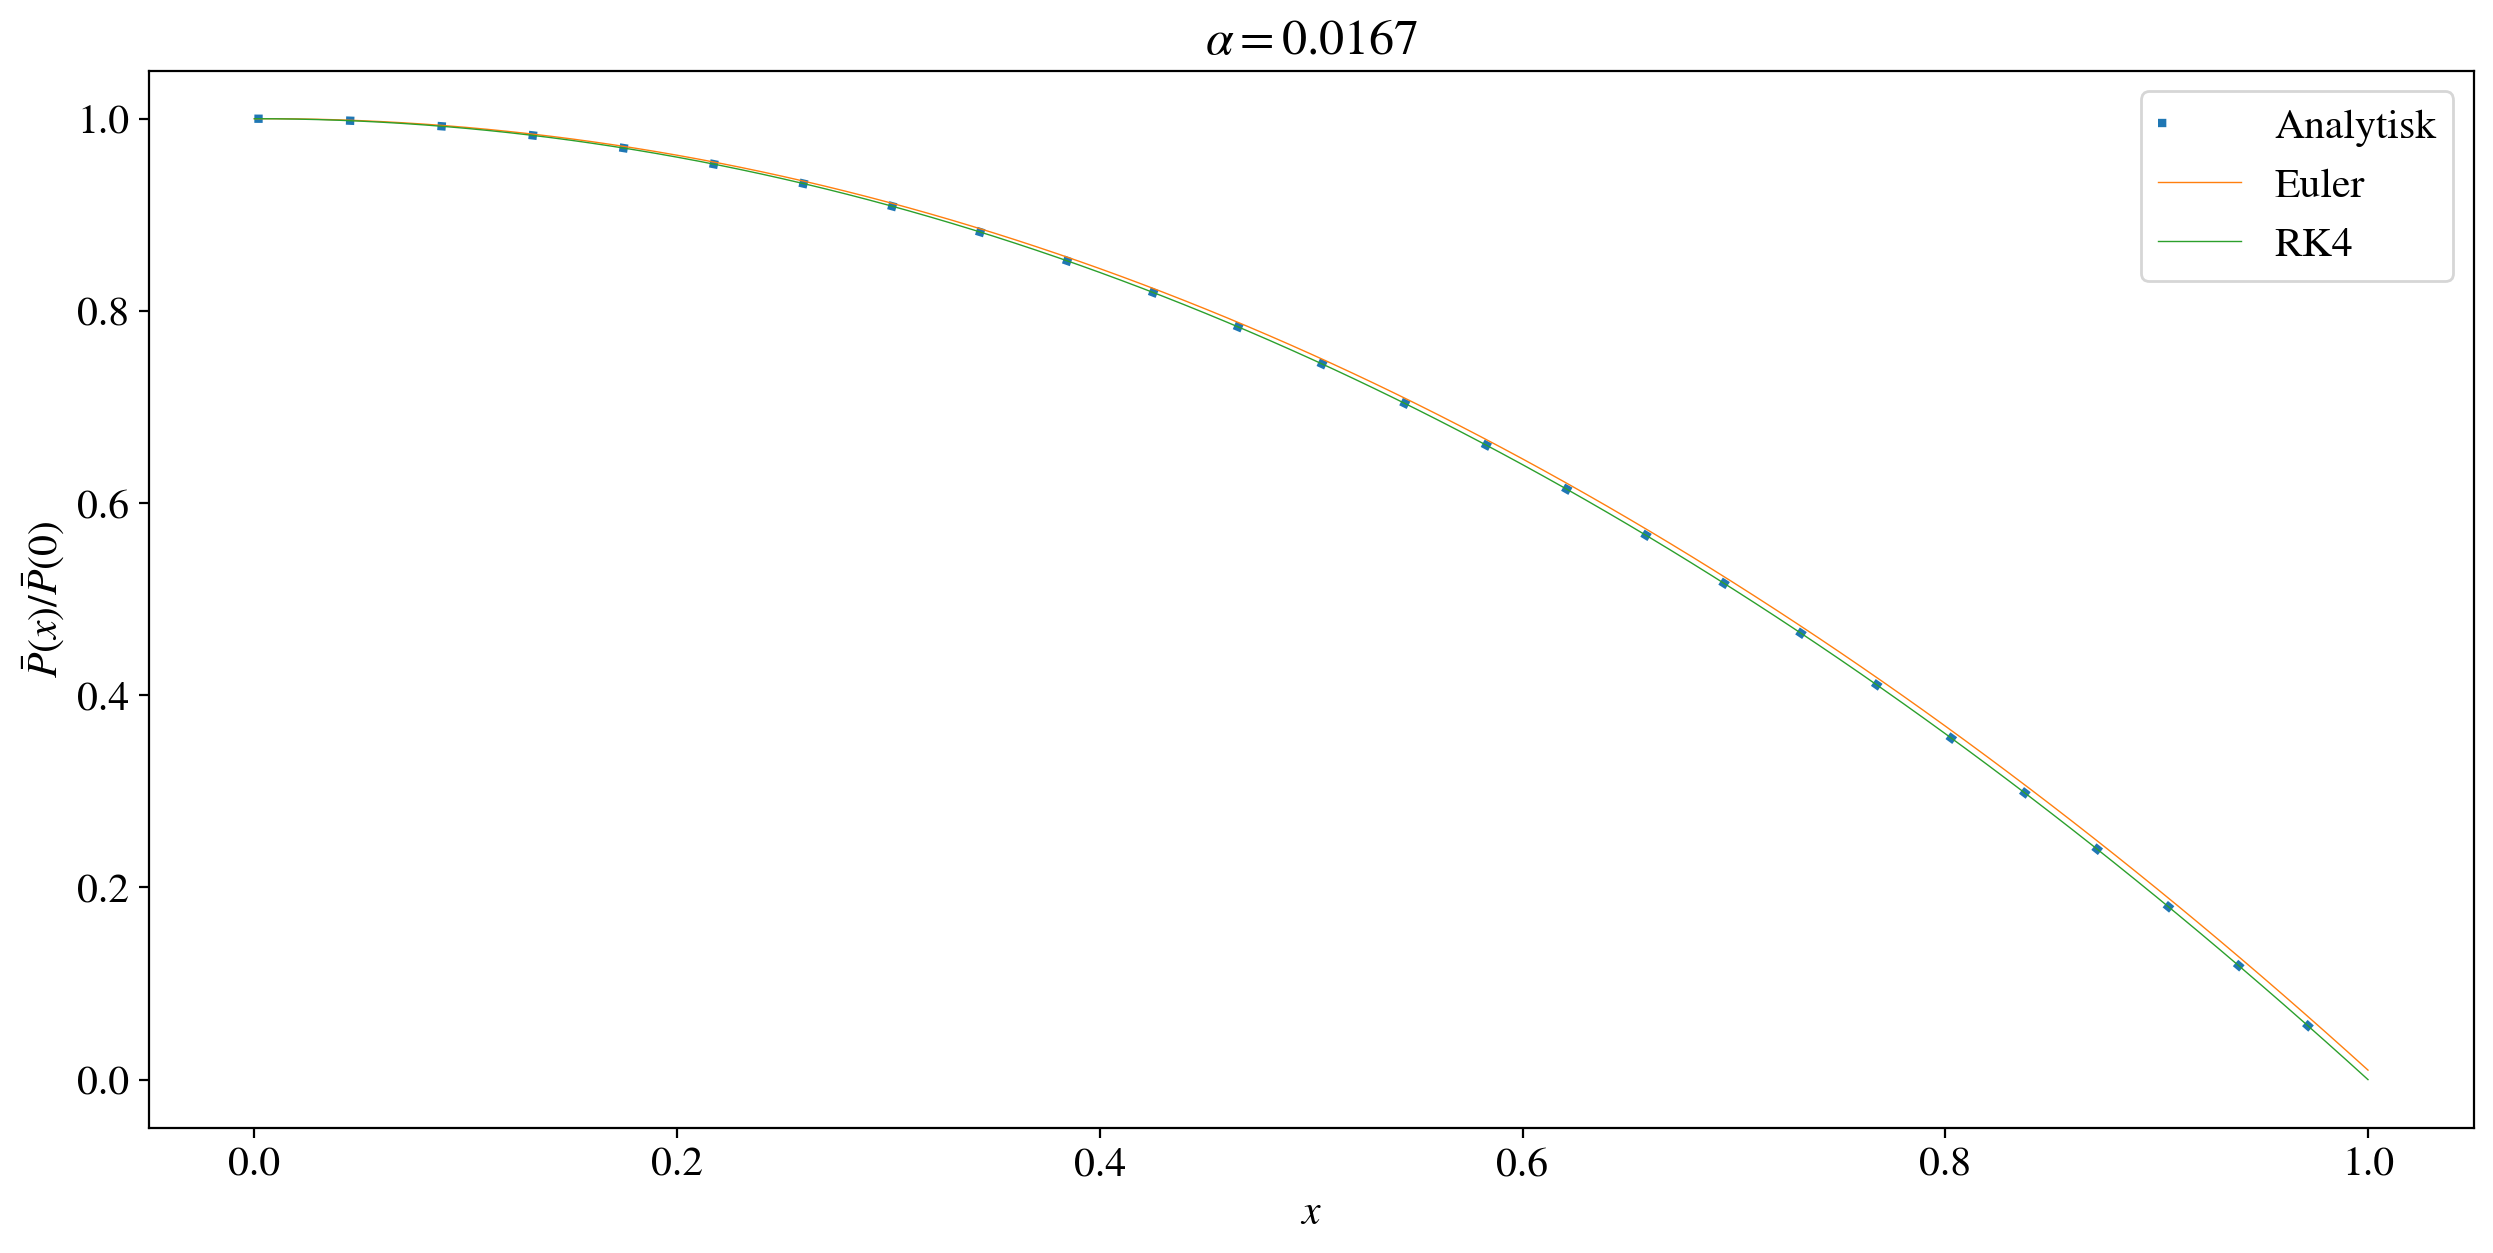

e_n(Euler): 4.199060462080536e-05
e_n(RK4): 6.858798468414862e-16
ALPHA: 0.86


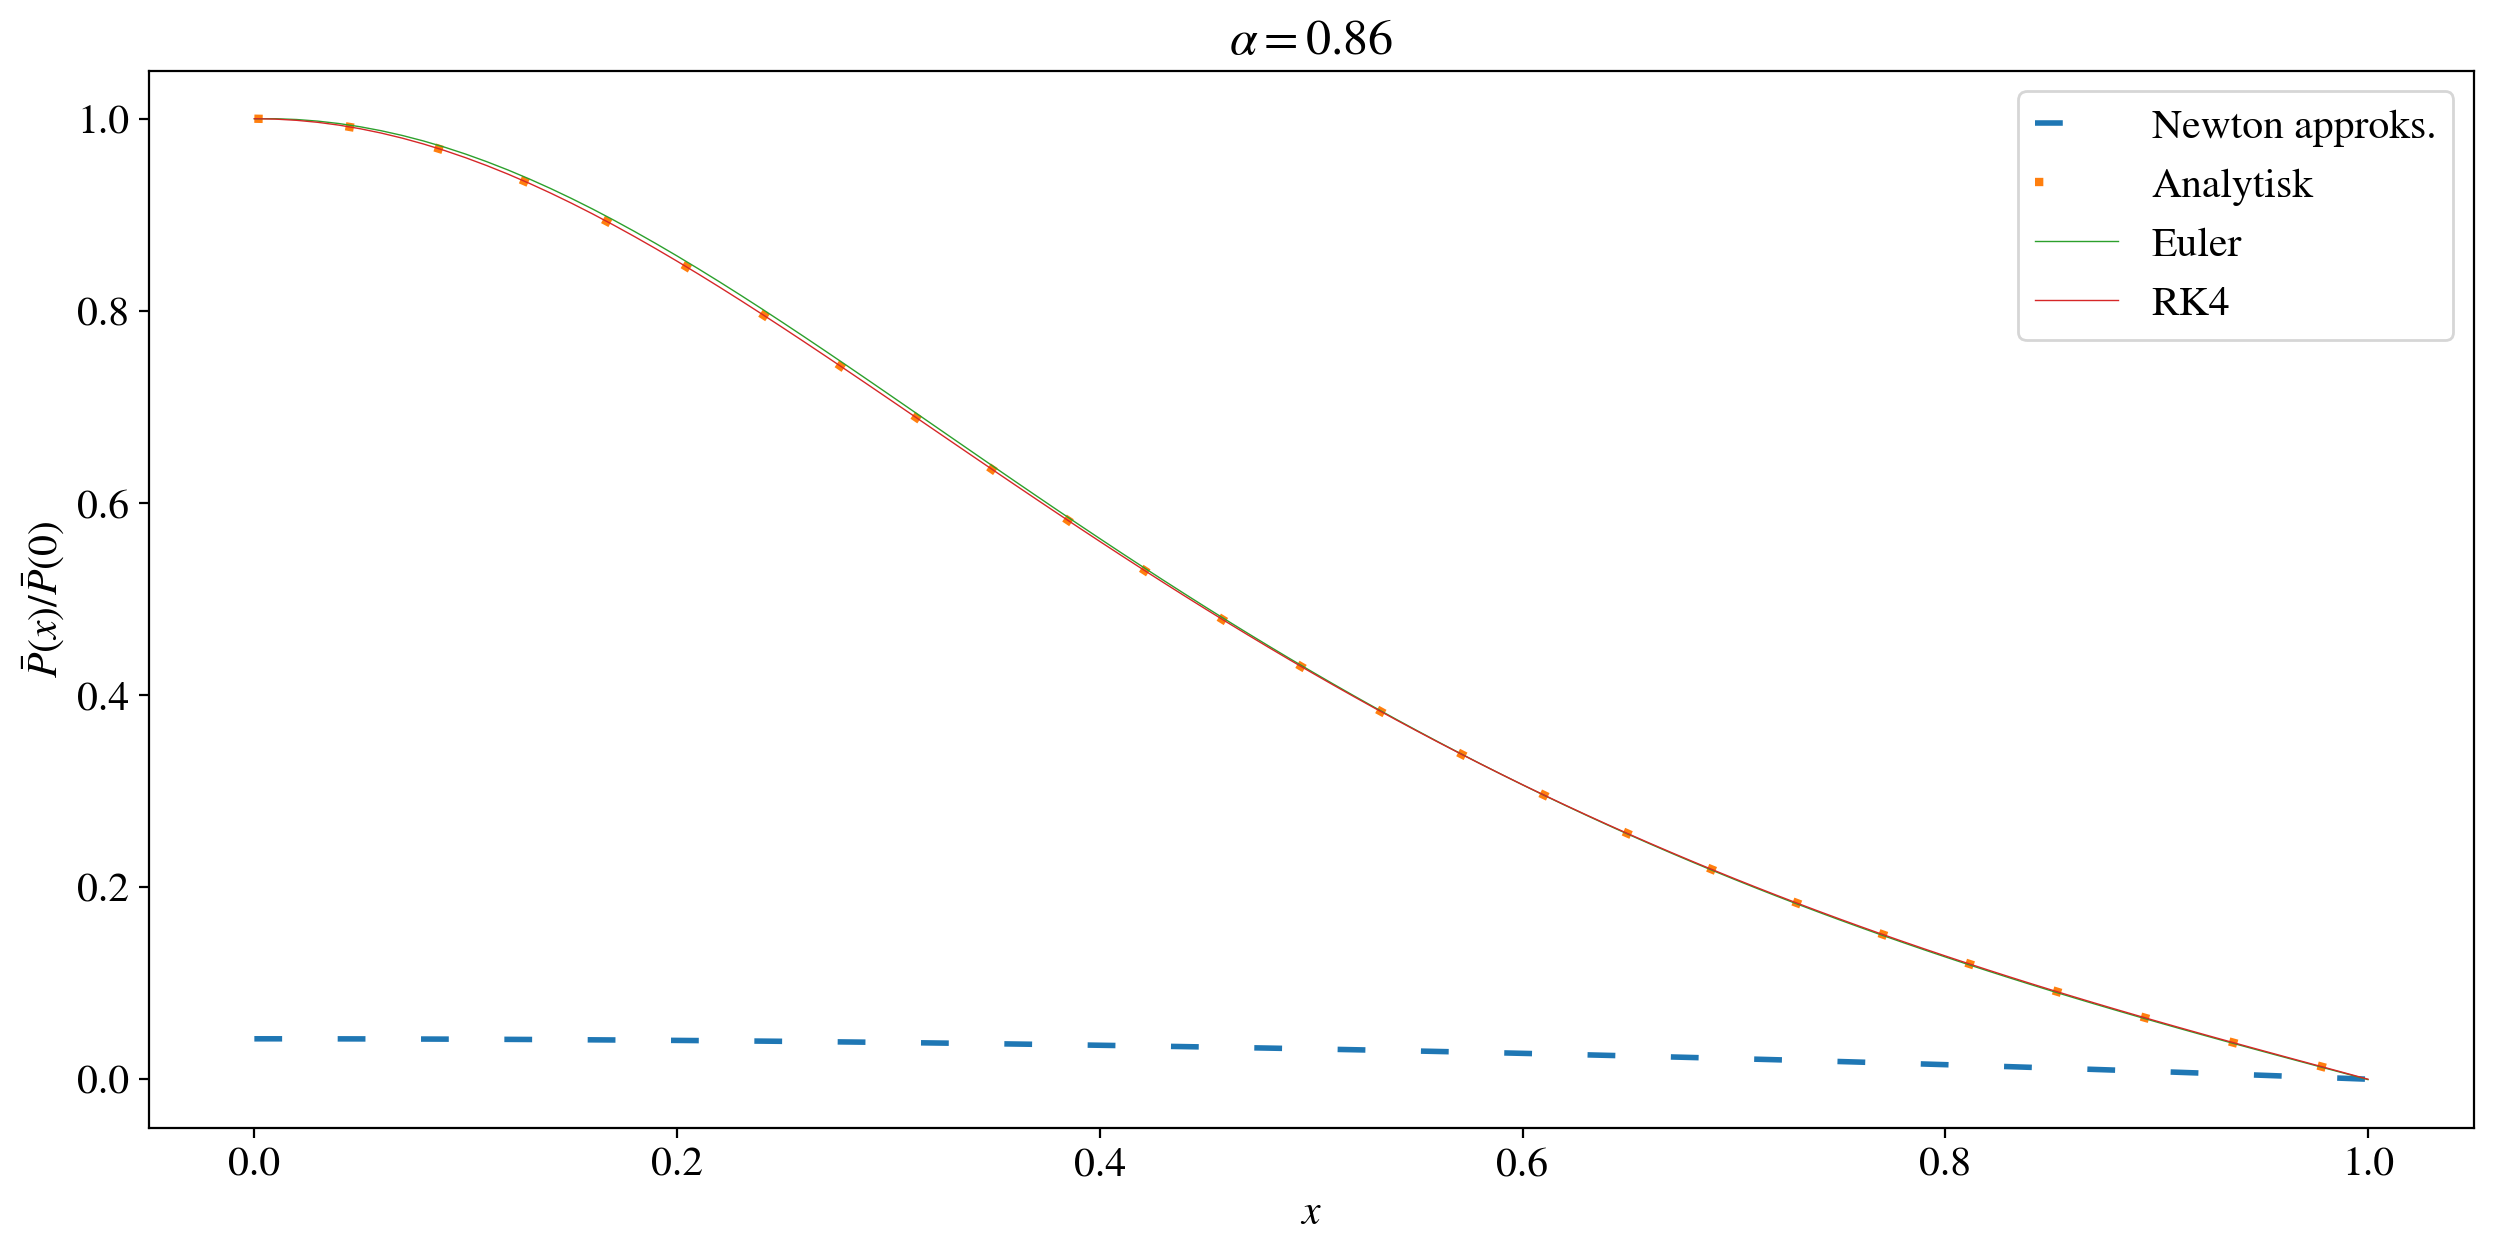

e_n(Euler): 0.0021356269318752903
e_n(RK4): 5.530959576102723e-08
ALPHA: 0.59


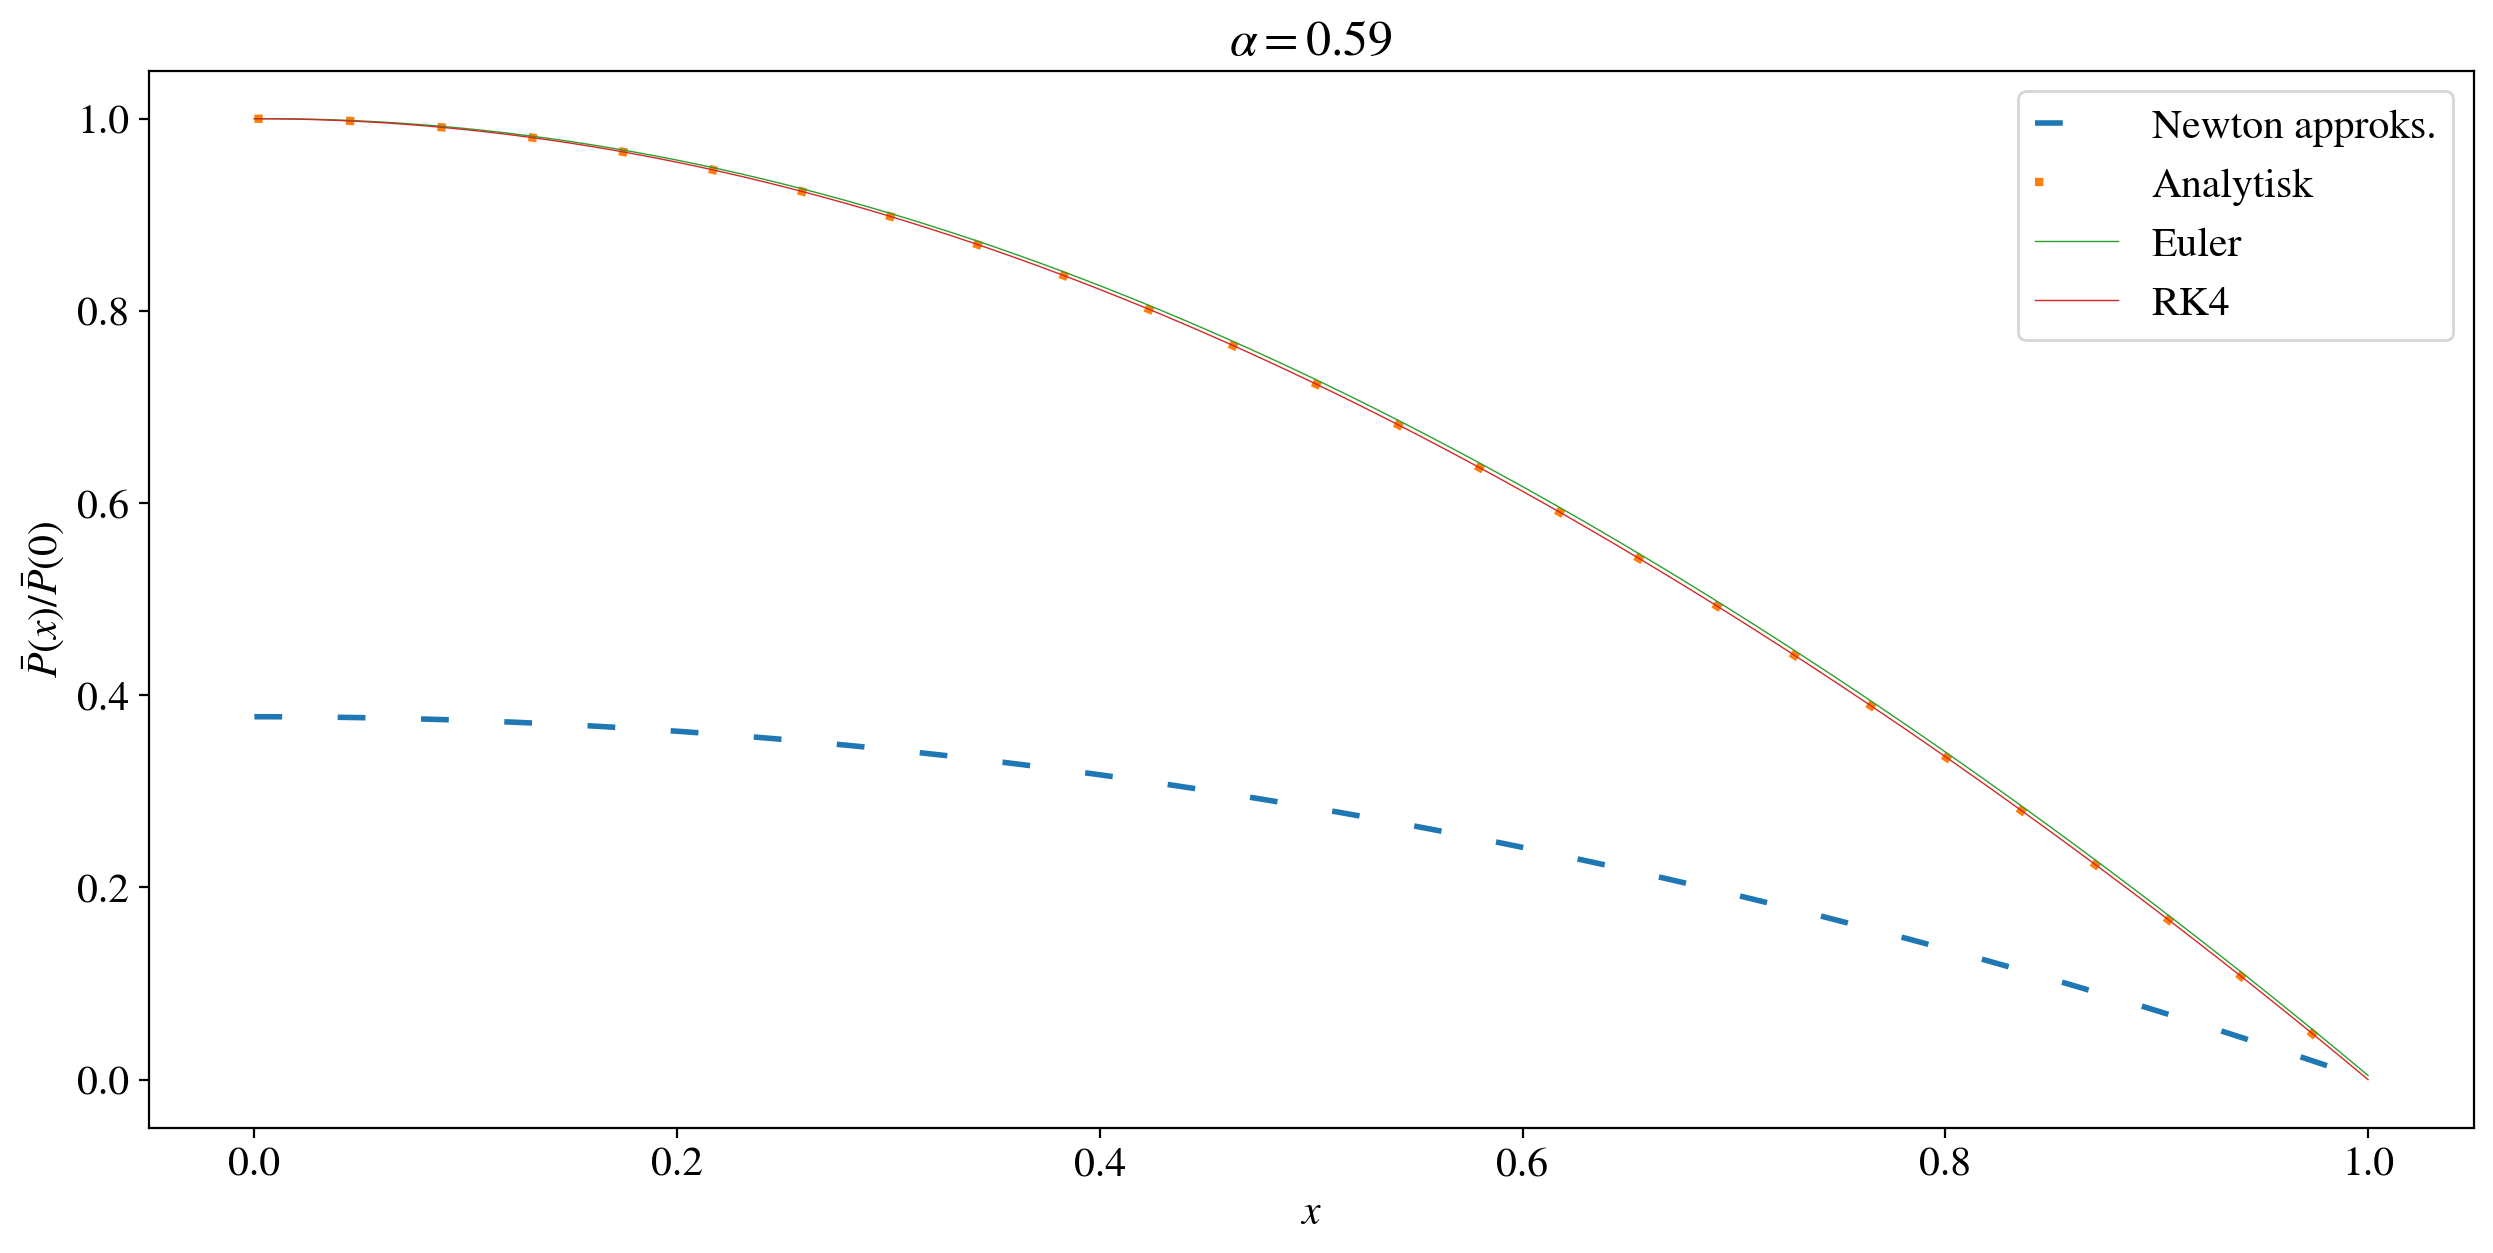

e_n(Euler): 0.001703682242740868
e_n(RK4): 5.907020289575016e-10
ALPHA: 0.0167


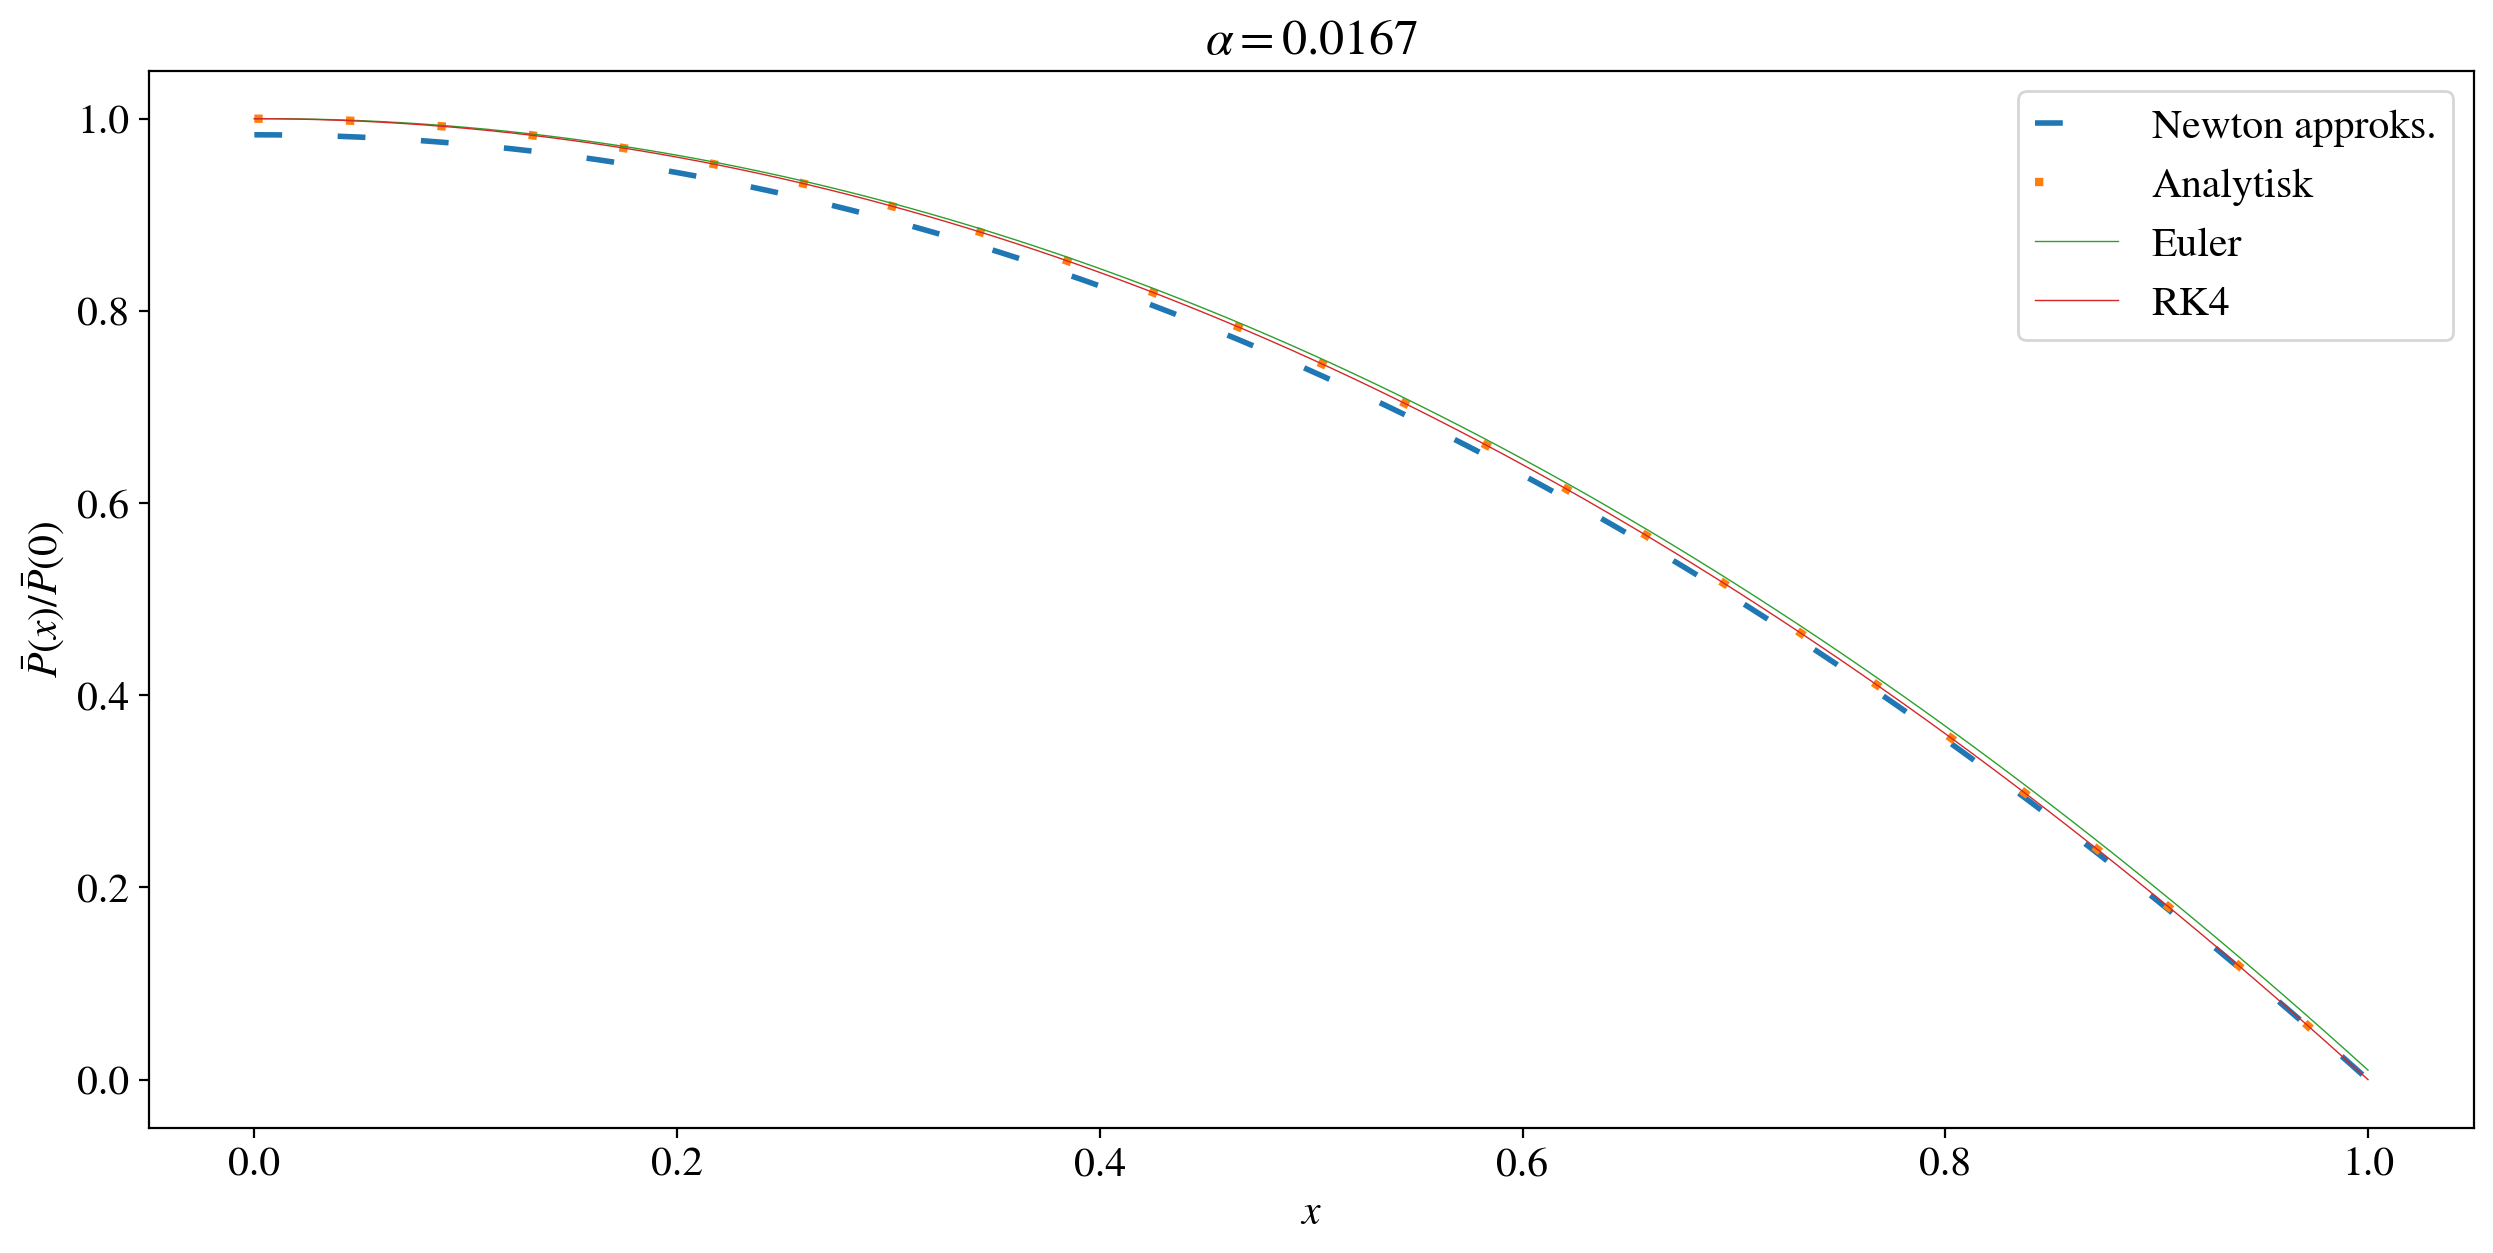

e_n(Euler): 4.199060462080536e-05
e_n(RK4): 6.858798468414862e-16


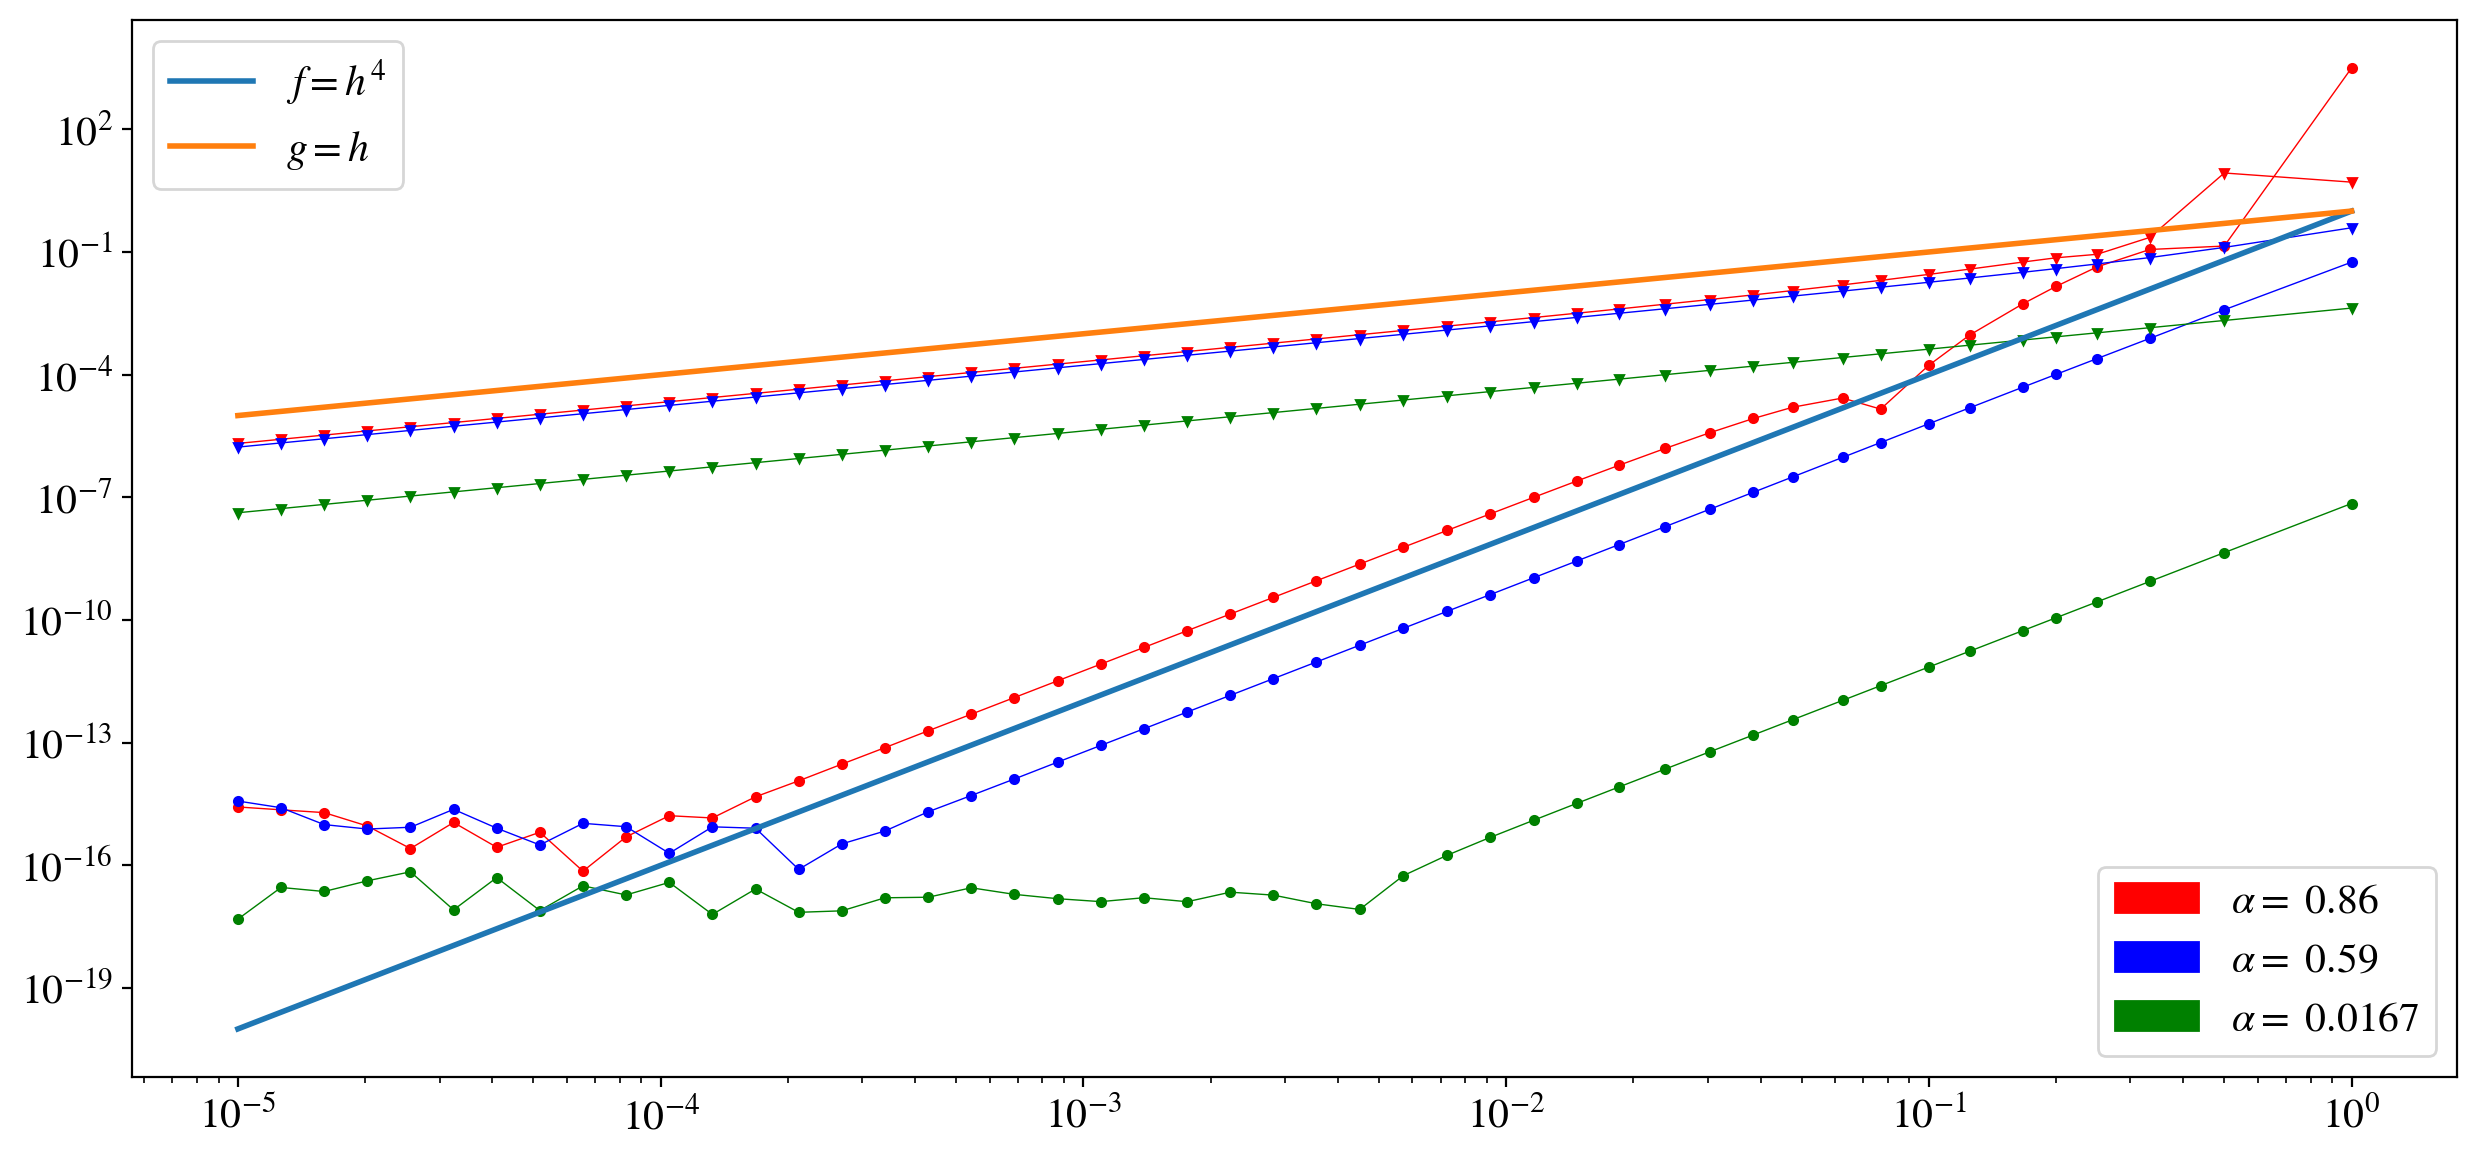

In [4]:
import matplotlib.patches as mpatches

def P_bar_analytic(x, alpha):
    return (np.sqrt(1-alpha) - np.sqrt(1-alpha*x**2)) / (np.sqrt(1-alpha*x**2) - 3*np.sqrt(1-alpha))

def Newton_approx(x, alpha):
    print("ALPHA: " + str(alpha))
    return 0.25*alpha*(1-x*x)

def structur_Eq(y, x, alpha):
    return (-0.5*alpha*x*(1+y)*(1+3*y))/(1-alpha*x*x)

def numerical_solution_fixed_interval_1D(N, f, y_0, start_t, end_t, alpha, method):
    h = (end_t-start_t)/N
    t_list = np.linspace(start_t, end_t, int(N)+1)
    y_list = np.zeros(int(N)+1)
    y_list[0] = y_0

    for i in range(0, int(N)):
        y_list[i+1] = method(y_list[i], h, f, t_list[i], alpha)  

    return y_list, t_list

def plot_P_bar(N, alpha, newton_approx=False):
    start_x = 0
    end_x = 1
    P_bar_0 = (np.sqrt(1-alpha)-1)/(1-3*np.sqrt(1-alpha))
    
    fig = plt.figure()

    if newton_approx:
        x_newton = np.linspace(0, 1, 100)
        P_bar_newton = Newton_approx(x_newton, alpha)
        plt.plot(x_newton, P_bar_newton/P_bar_0, label="Newton approks.", linestyle = (0,(5,10)))

    x_an = np.linspace(0, 1, 100)
    P_bar_an = P_bar_analytic(x_an,alpha)
    P_bar_euler, x_euler = numerical_solution_fixed_interval_1D(N, structur_Eq, P_bar_0, start_x, end_x, alpha, step_Euler)
    P_bar_RK4, x_RK4 = numerical_solution_fixed_interval_1D(N, structur_Eq, P_bar_0, start_x, end_x, alpha, RK4_step)
    
    plt.plot(x_an, P_bar_an/P_bar_0, label="Analytisk", linewidth = 3, linestyle = (0,(1,10)))
    plt.plot(x_euler, P_bar_euler/P_bar_0, label="Euler", linewidth = 0.5)
    plt.plot(x_RK4, P_bar_RK4/P_bar_0, label="RK4", linewidth = 0.5)
    plt.title(r"$\alpha=$" + str(alpha))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\bar{P}(x)/\bar{P}(0)$')
    plt.legend()
    plt.show()
 
    
    #print global error:
    print("e_n(Euler): " + str(abs(P_bar_euler[-1] - P_bar_analytic(x_euler[-1],alpha))))
    print("e_n(RK4): " + str(abs(P_bar_RK4[-1] - P_bar_analytic(x_RK4[-1],alpha))))
    
def f(x):
    return x**4
def g(x):
    return x
    
def plot_en(N_list, alpha_list):
    colors = ["red","blue","green"] #for alpha-patches
    patches = []
    start_x = 0.0
    end_x = 1.0
    h_list = np.zeros(len(N_list))
    for i in range(len(alpha_list)):
        P_bar_0 = (np.sqrt(1-alpha_list[i])-1)/(1-3*np.sqrt(1-alpha_list[i]))
        en_euler = np.zeros(len(N_list))
        en_RK4 = np.zeros(len(N_list))
        for j in range(len(N_list)):
            h = (end_x-start_x)/N_list[j]
            h_list[j] = h
            P_bar_euler, x_euler = numerical_solution_fixed_interval_1D(N_list[j], structur_Eq, P_bar_0, start_x, end_x, alpha_list[i], step_Euler)
            P_bar_RK4, x_RK4 = numerical_solution_fixed_interval_1D(N_list[j], structur_Eq, P_bar_0, start_x, end_x, alpha_list[i], RK4_step)
            
            en_euler[j] = abs(P_bar_euler[-1])
            en_RK4[j] = abs(P_bar_RK4[-1])
            
            
        plt.plot(h_list,en_euler, color = colors[i], linewidth = 0.5, marker = "v", markersize = 3 ) #dotted
        plt.plot(h_list,en_RK4,color = colors[i], linewidth = 0.5,marker = "o",markersize = 3) #dashed
        patches.append(mpatches.Patch(color=colors[i], label=r'$\alpha =$ ' + str(alpha_list[i])))
        
    l1, = plt.plot(h_list,f(h_list), label = r"$f = h^4$")
    l2, = plt.plot(h_list,g(h_list), label = r"$g = h$")
    first_legend = plt.legend(handles=[l1,l2], loc='upper left')
    ax = plt.gca().add_artist(first_legend)
    plt.legend(handles=patches, loc='lower right')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

N = 100 #=> h = 0.01
alpha_values=[0.86, 0.59, 0.0167]

plot_P_bar(N, alpha_values[0])
plot_P_bar(N, alpha_values[1])
plot_P_bar(N, alpha_values[2])


#Med Newtons approksimasjon
plot_P_bar(N, alpha_values[0], True)
plot_P_bar(N, alpha_values[1], True)
plot_P_bar(N, alpha_values[2], True)

#global error vs step length
N_list = np.unique(np.logspace(0,5,50, base = 10,dtype = int)) #use logspace to get even distr of N's and then unique to get rid of duplicates.
plot_en(N_list,[0.86,0.59,0.0167])

